In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## 1. Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [2]:
housing_data = pd.read_csv('train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_data.shape

(1460, 81)

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
## Dropping ID col as it is only an identifier and does not help in analysis
housing_data.drop("Id",axis = 1, inplace=True)

### Understanding data with Data dictionary

In [6]:
vars_to_convert = ['MSSubClass','OverallQual','OverallCond' ]

In [7]:
housing_data[vars_to_convert] = housing_data[vars_to_convert].astype('O')

In [8]:
cat_vars = [feature for feature in housing_data.columns if housing_data[feature].dtype =='O']
num_vars = [feature for feature in housing_data.columns if housing_data[feature].dtype !='O']

## Treating Missing Values

In [9]:
missing_df = pd.DataFrame(np.round(housing_data.isnull().sum()*100/(len(housing_data.index)),4), columns = ["per_Missing_val"])
missing_df.sort_values(by = ['per_Missing_val'], ascending = False).head(20)

,per_Missing_val
PoolQC,99.5205
MiscFeature,96.3014
Alley,93.7671
Fence,80.7534
MasVnrType,59.7260
FireplaceQu,47.2603
LotFrontage,17.7397
GarageYrBlt,5.5479
GarageCond,5.5479
GarageType,5.5479


In [10]:
# Imputing Missing values with NA in PoolQC for housing with no pool
housing_data['PoolQC'] = housing_data['PoolQC'].fillna('NA')

# Imputing Missing values with NA in MiscFeature for housing with no Misc Feature
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('NA')

#Imputing Missing Values as per Data_description

housing_data['Alley'] = housing_data['Alley'].fillna('NA')
housing_data['Fence'] = housing_data['Fence'].fillna('NA')

housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('NA')

housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)

In [11]:
#Imputing the Nan Values with 'No Basement_data'
for feature in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing_data[feature] = housing_data[feature].fillna('NA')
    
#Imputing the NaN values with 'No garage' 
for feature in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing_data[feature] = housing_data[feature].fillna('NA')

In [12]:
housing_data['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [13]:
# Only 1 missing value from feature Electrical
# Mode value frequency is higher 
#hence replacing NAN with mode value
housing_data['Electrical'] = housing_data['Electrical'].fillna(housing_data.Electrical.mode())

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

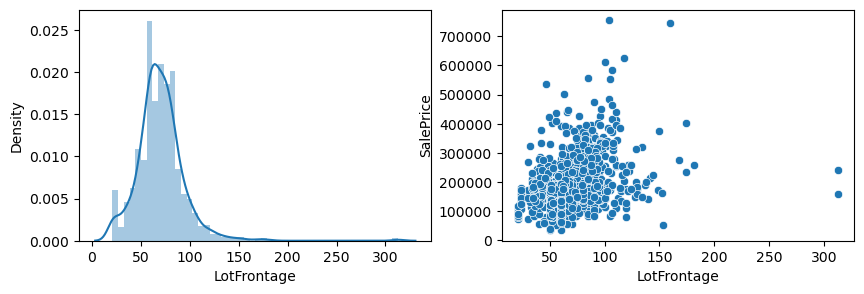

In [14]:
fig, axes = plt.subplots(1,2, figsize = (10,3))

sns.distplot(housing_data.LotFrontage, ax=axes[0])
sns.scatterplot(ax =axes[1], y = housing_data.SalePrice, x = housing_data.LotFrontage)

As seen from the plots; Lot Frontage is an important feature and dependent variable SalePrice is fairly related to it.
Hence can't drop Lot Frontage; we will impute values for Lot Frontage at a later stage

In [15]:
housing_data.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Outlier Treatment

In [16]:
outliers_per = {}
for feature in housing_data[num_vars].columns:
    IQR = housing_data[feature].quantile(0.75) - housing_data[feature].quantile(0.25)
    outliers_count = housing_data[(housing_data[feature] > (housing_data[feature].quantile(0.75) + 1.5*IQR)) |
                                  (housing_data[feature] < (housing_data[feature].quantile(0.25) - 1.5*IQR))].shape[0]
    outliers_per[feature] = round(outliers_count/housing_data.shape[0]*100,2)
outliers = pd.DataFrame({'Features': list(outliers_per.keys()),'Percentage_Outliers': list(outliers_per.values())})
outliers.sort_values(by = 'Percentage_Outliers', ascending = False)

,Features,Percentage_Outliers
26,EnclosedPorch,14.25
6,BsmtFinSF2,11.44
28,ScreenPorch,7.95
4,MasVnrArea,6.71
0,LotFrontage,6.03
14,BsmtHalfBath,5.62
25,OpenPorchSF,5.27
1,LotArea,4.73
18,KitchenAbvGr,4.66
33,SalePrice,4.18


In [17]:
for feature in outliers_per.keys():
    if feature!= 'SalePrice':
        #print(housing_data[feature])
        IQR = housing_data[feature].quantile(0.75) - housing_data[feature].quantile(0.25)
        max_val =  housing_data[feature].quantile(0.75) + 1.5*IQR
        min_val =  housing_data[feature].quantile(0.25) - 1.5*IQR
        housing_data[feature][housing_data[feature] > max_val] = max_val
        housing_data[feature][housing_data[feature] < min_val] = min_val

## Data Analysis

In [18]:
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [19]:
# Converting Year built to Age for clearer interpretation
housing_data['Age'] = 2023 - housing_data['YearBuilt']
housing_data['Yrs_since_remod'] = 2023 - housing_data['YearRemodAdd']

In [20]:
housing_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis =1, inplace = True)

In [21]:
#Updating Numerical Features
num_vars = [feature for feature in housing_data.columns if housing_data[feature].dtype !='O']

In [22]:
def countplt(feature_list):
    plt.figure(figsize=(20, 20))
    for i,feature in enumerate(feature_list):
        plt.subplot(5,3,i+1)
        plt.subplots_adjust(hspace= 2.0)
        sns.countplot(x = feature, data = housing_data)
        plt.xticks(rotation=90)
        plt.tight_layout()
    plt.show()

def boxplt(feature_list):
    plt.figure(figsize=(20, 20))
    for i,feature in enumerate(feature_list):
        plt.subplot(5,3,i+1)
        plt.subplots_adjust(hspace= 2.0)
        sns.boxplot(y = 'SalePrice', x = feature, data = housing_data)
        plt.tight_layout()
    plt.show()

def distplt(feature_list):
    plt.figure(figsize=(20, 20))
    for i,feature in enumerate(feature_list):
        plt.subplot(12,3,i+1)
        plt.subplots_adjust(hspace= 2.0)
        sns.distplot(x = housing_data[feature])
        plt.tight_layout()
    plt.show()

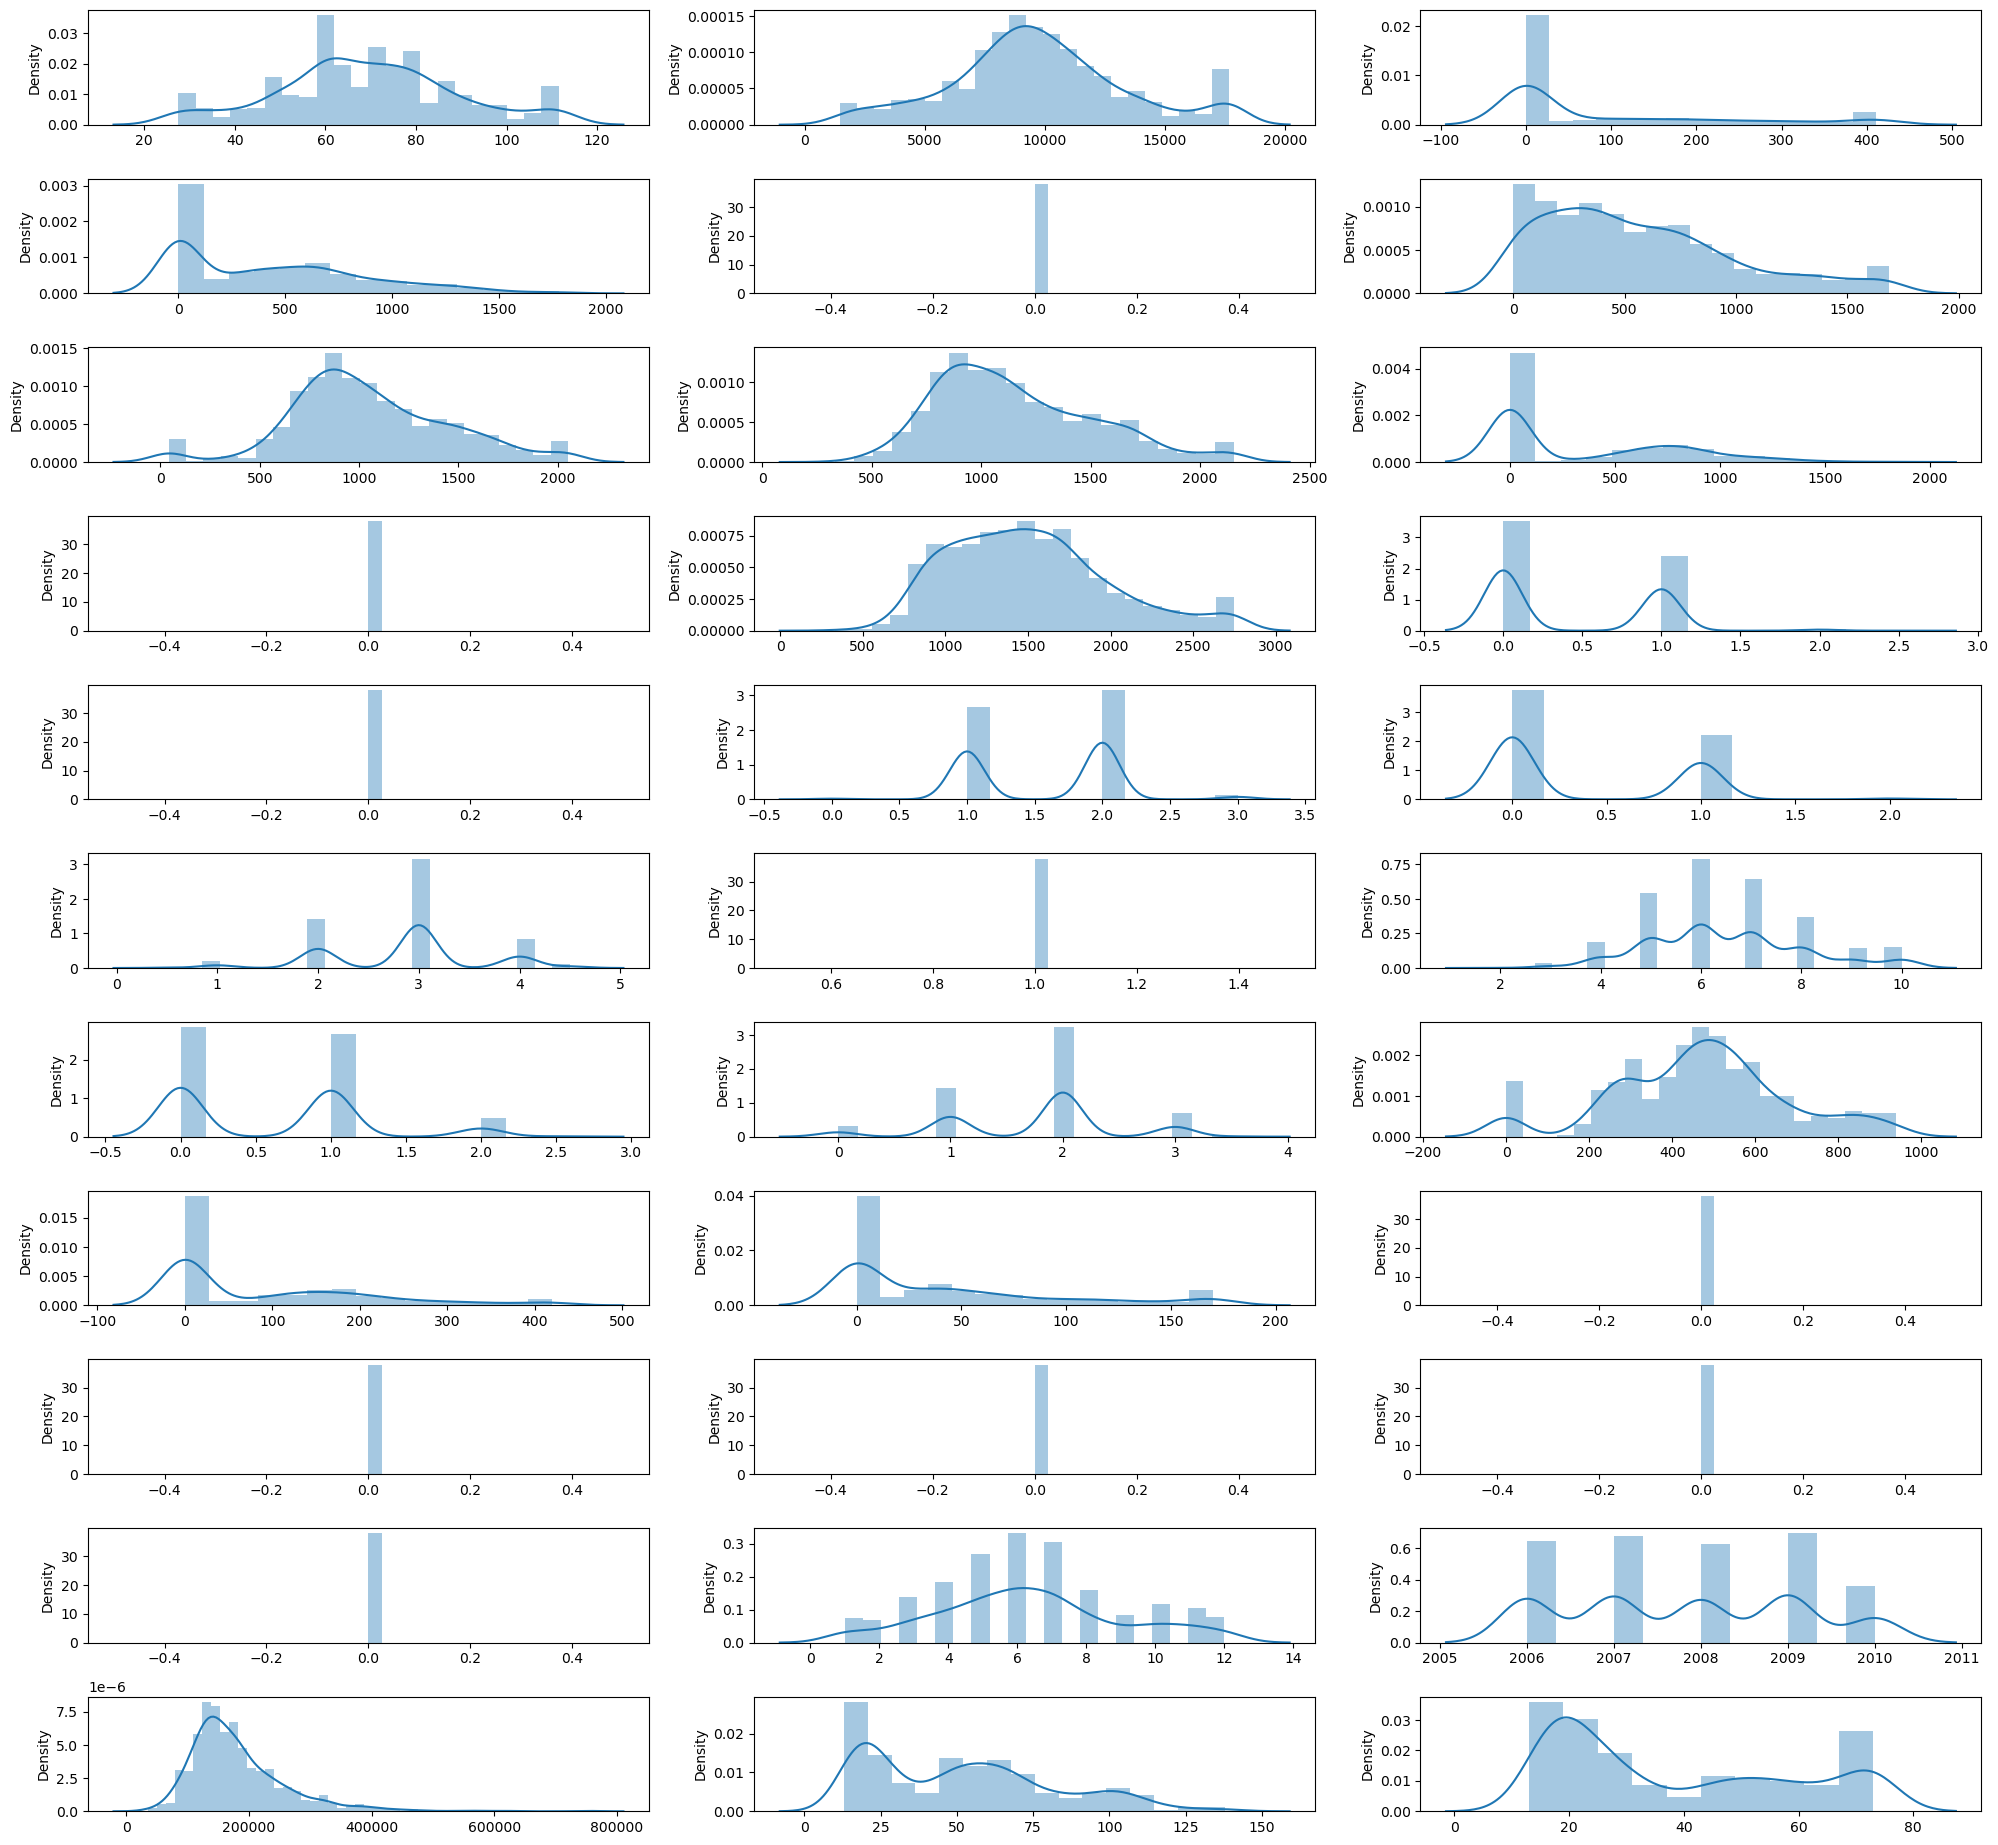

In [23]:
distplt(num_vars)

In [24]:
# Dropping features with single value as it will not contribute in prediction
housing_data.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'],axis=1,inplace=True)

In [25]:
#Dividing into feature list for Visualisation
feature_list_1 = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                  'LotConfig','LandSlope','Neighborhood','Condition1','Condition2']
feature_list_2 = ['BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl',
                   'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation']
feature_list_3 = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                  'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu']
feature_list_4 = ['GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',
                  'Fence','MiscFeature','SaleType','SaleCondition']

### Univariate & Bivariate Analysis

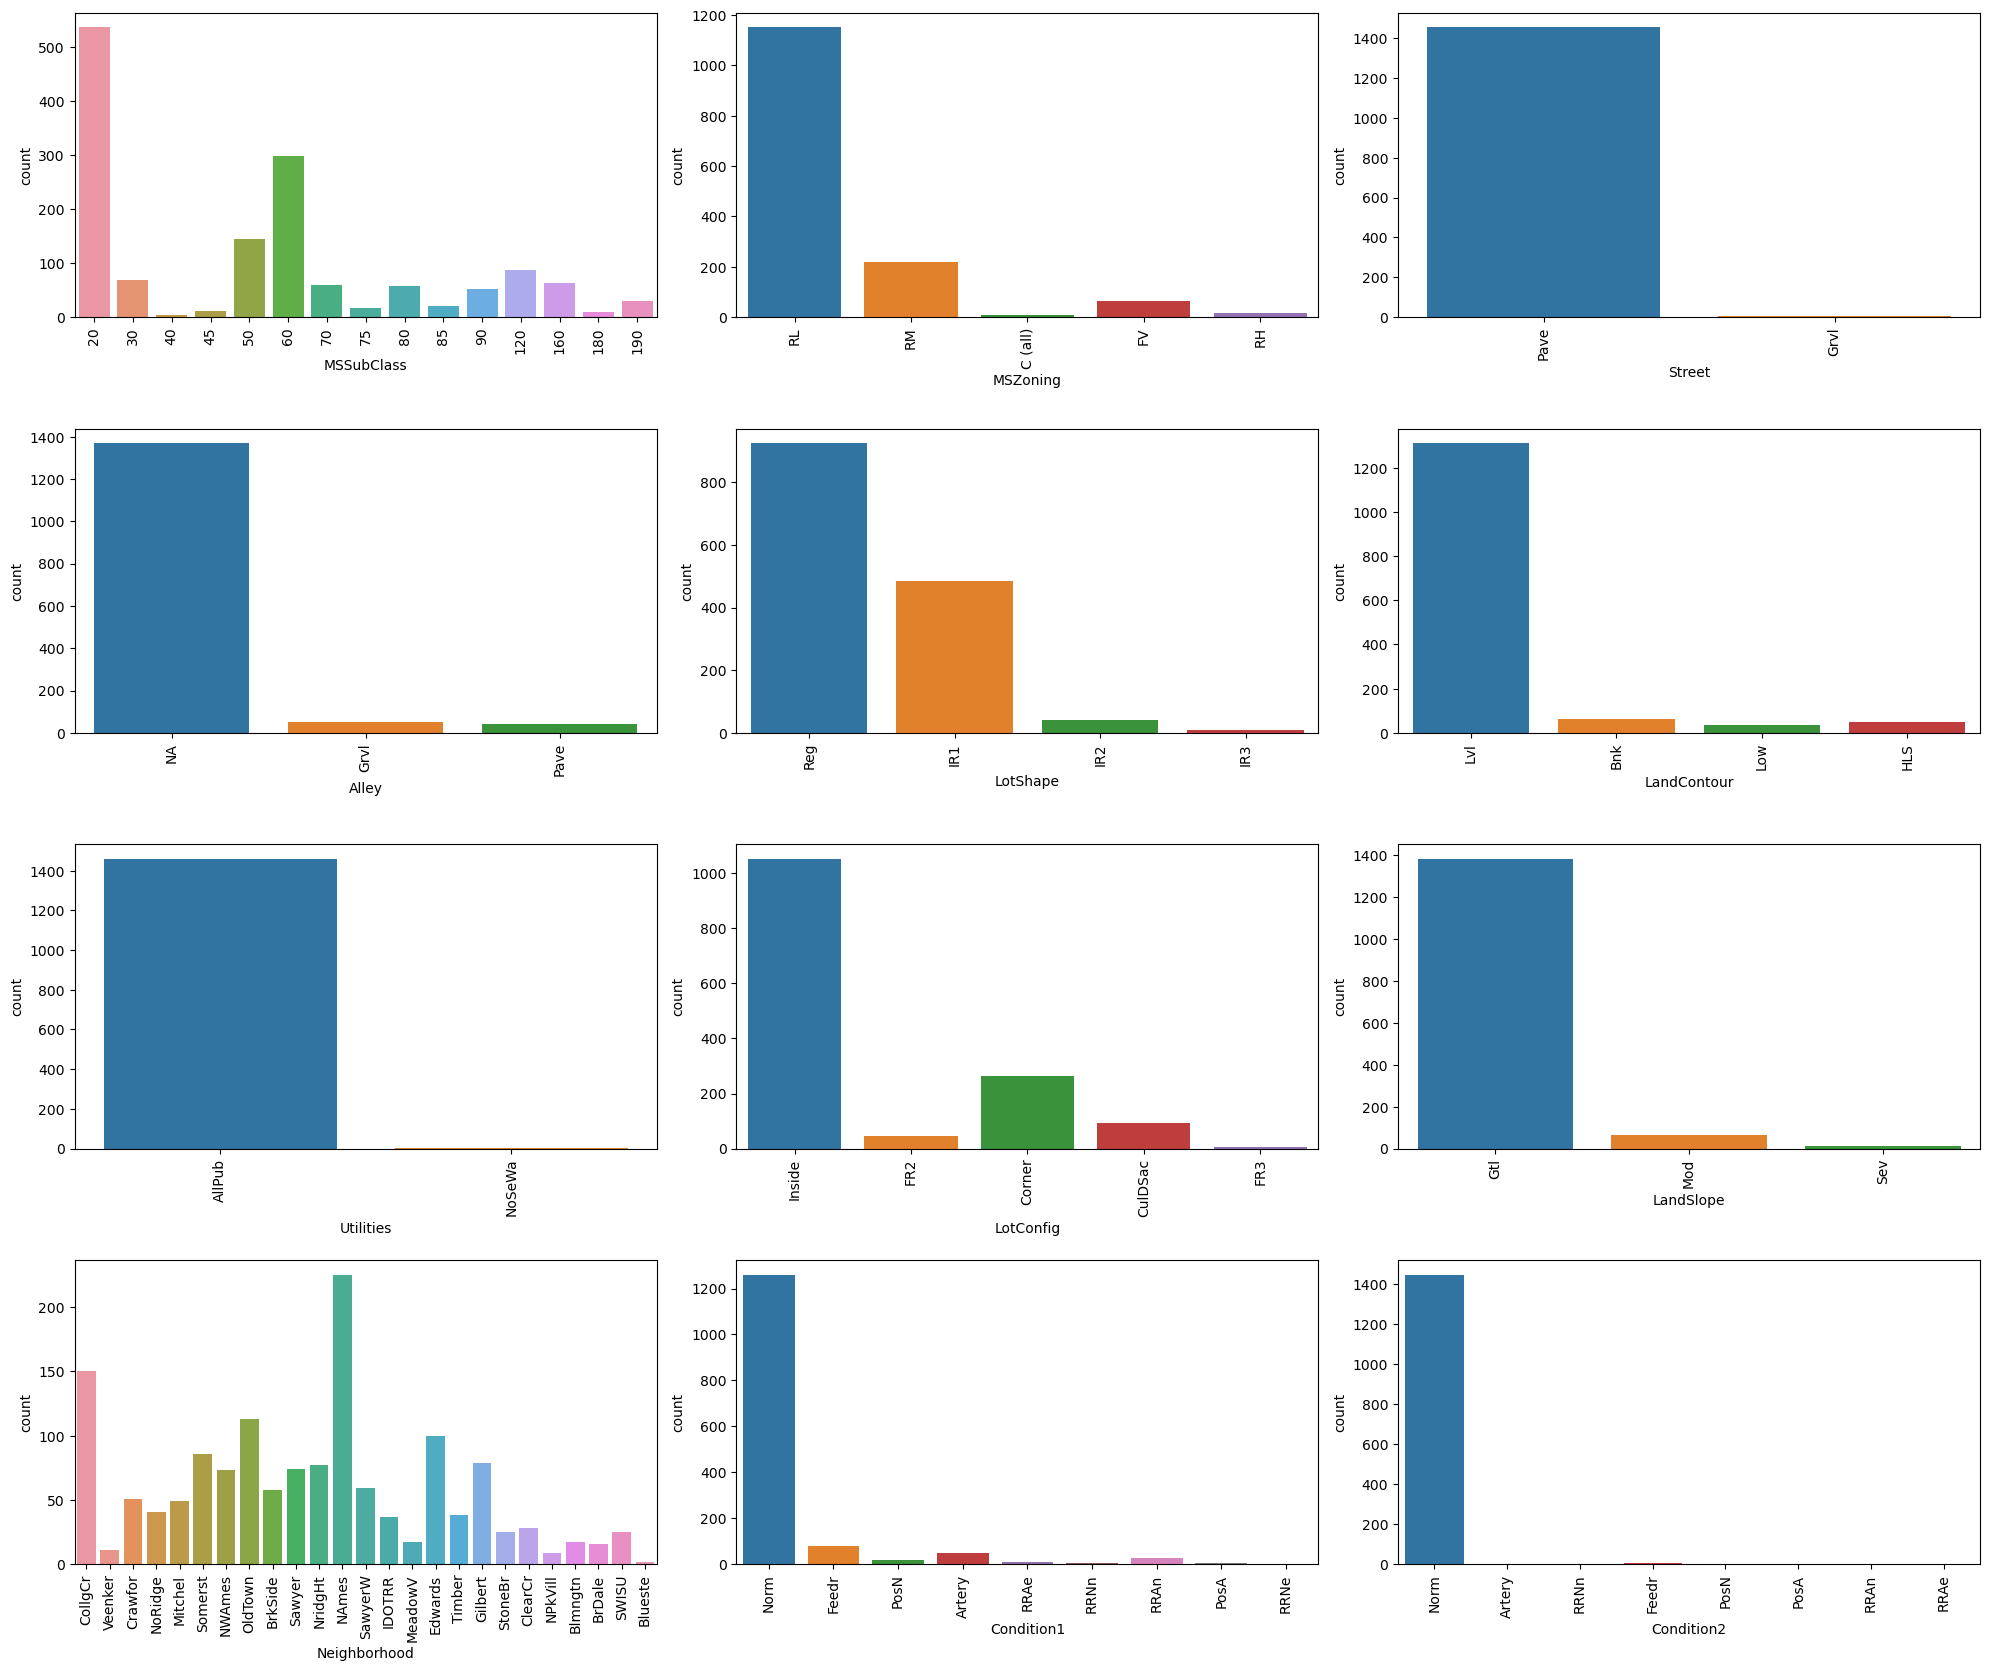

In [26]:
countplt(feature_list_1)

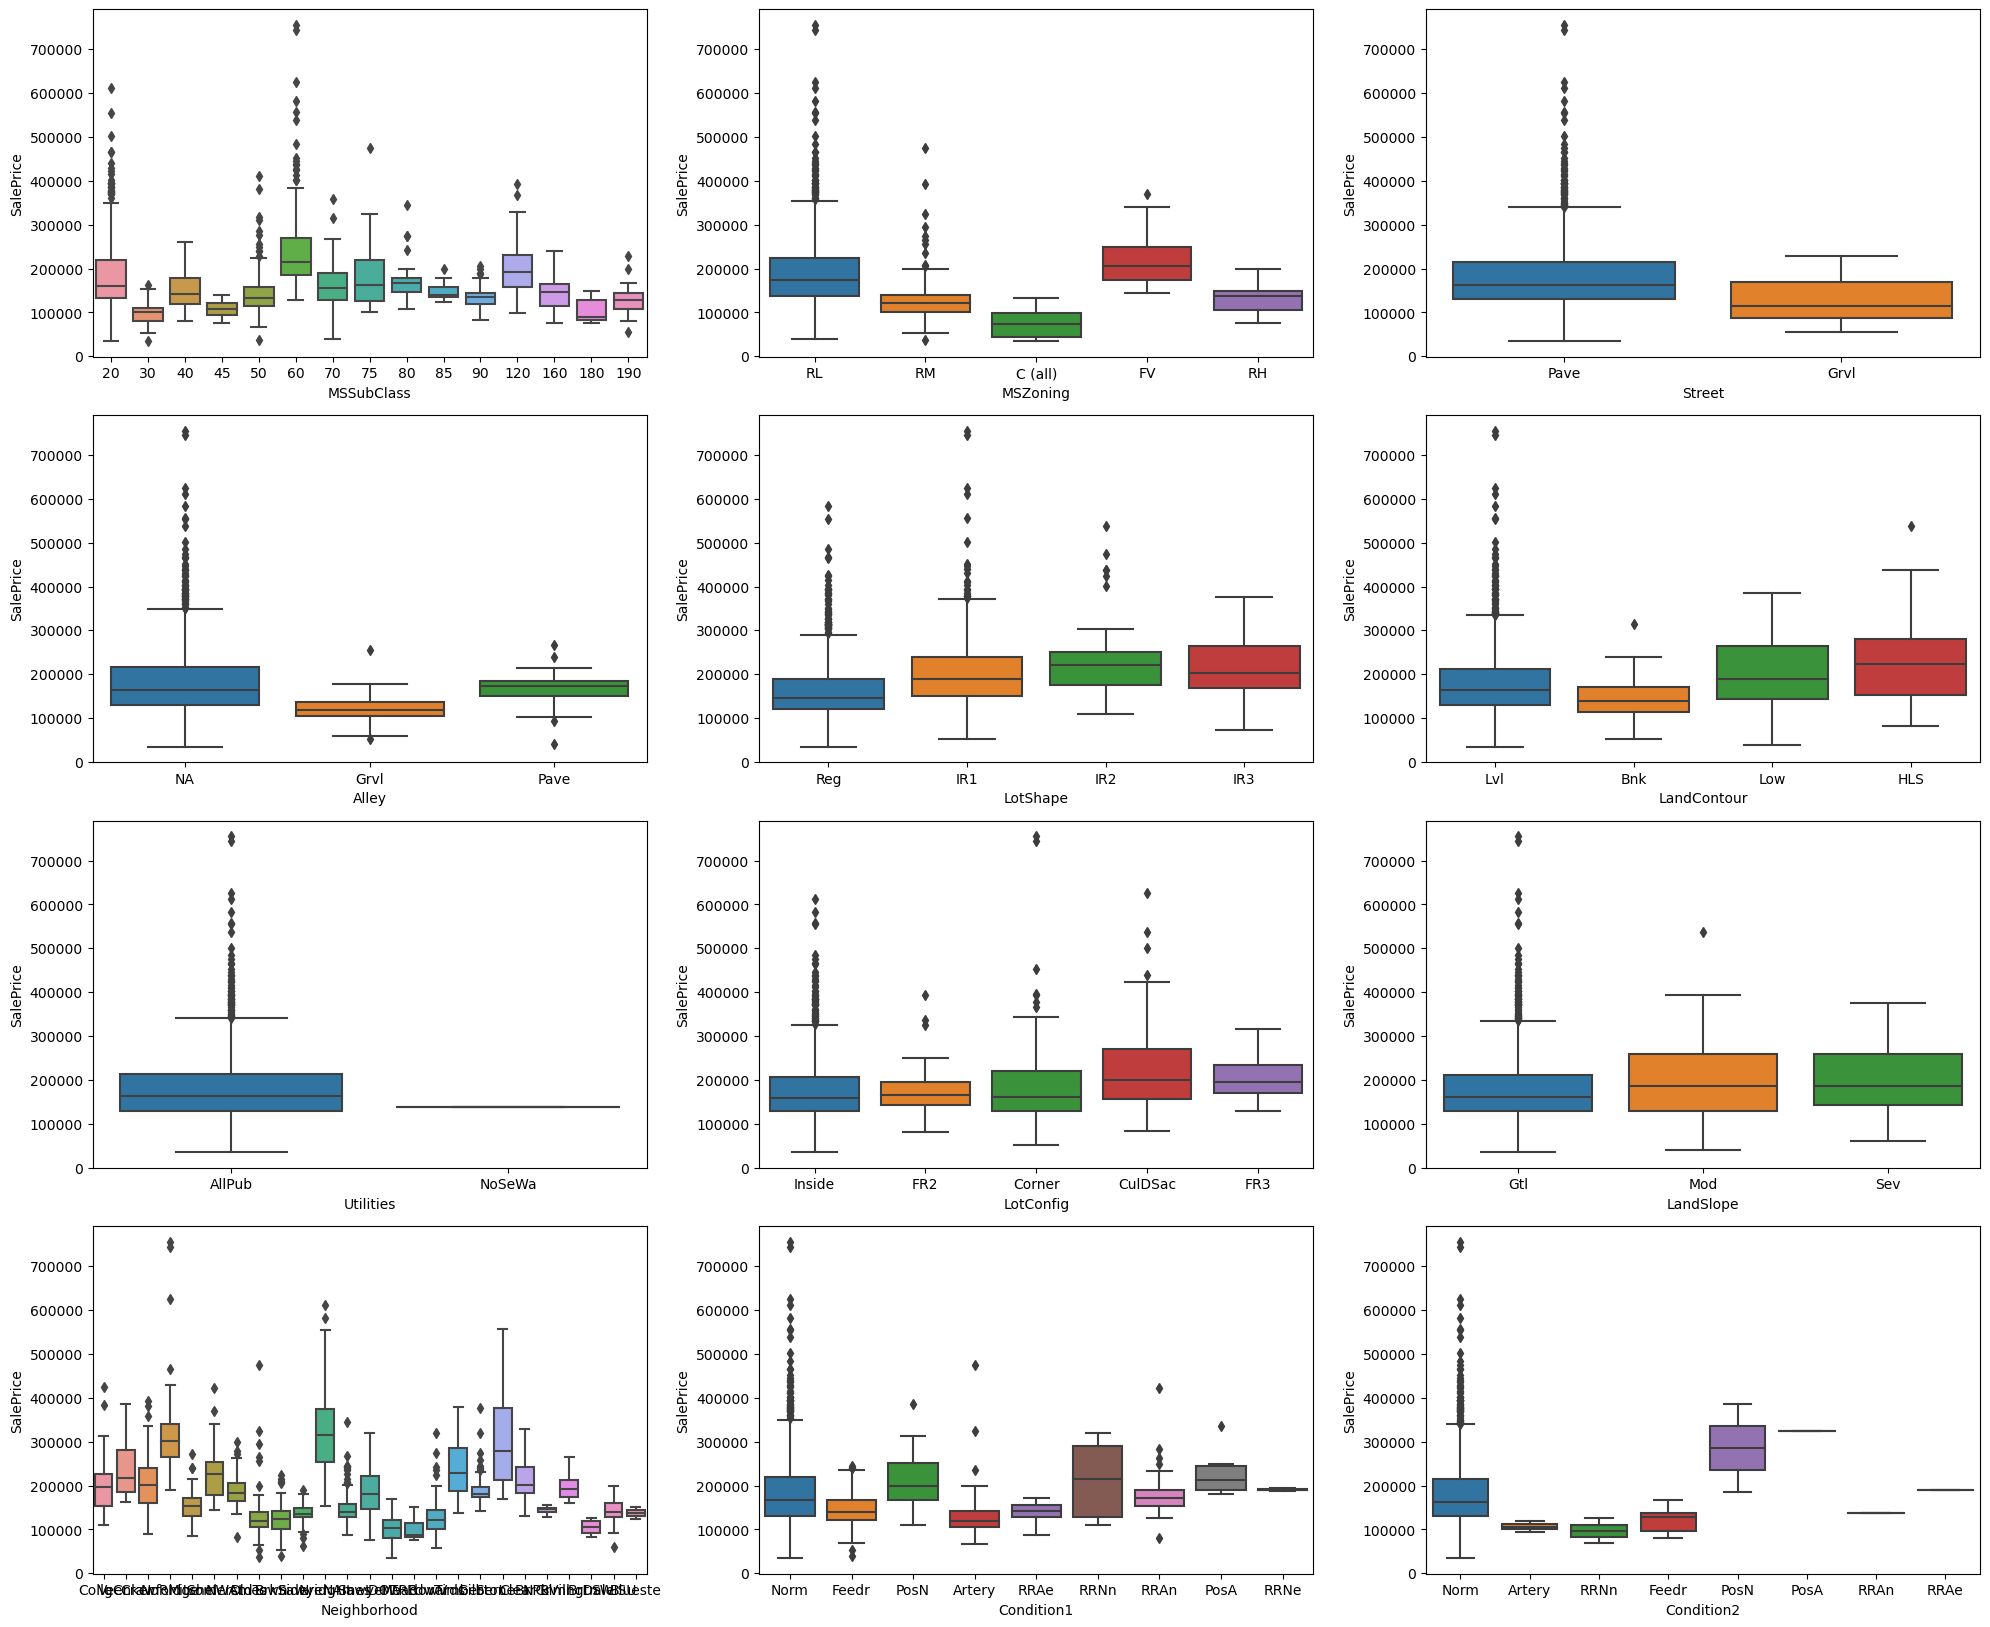

In [27]:
boxplt(feature_list_1)

In [28]:
# Dropping Street, ALley and Utilities as columns have one highly dominant value and 
# Much variation is not seen in boxplot with SalePrice
housing_data.drop(['Street','Alley','Utilities'], axis=1,inplace = True)

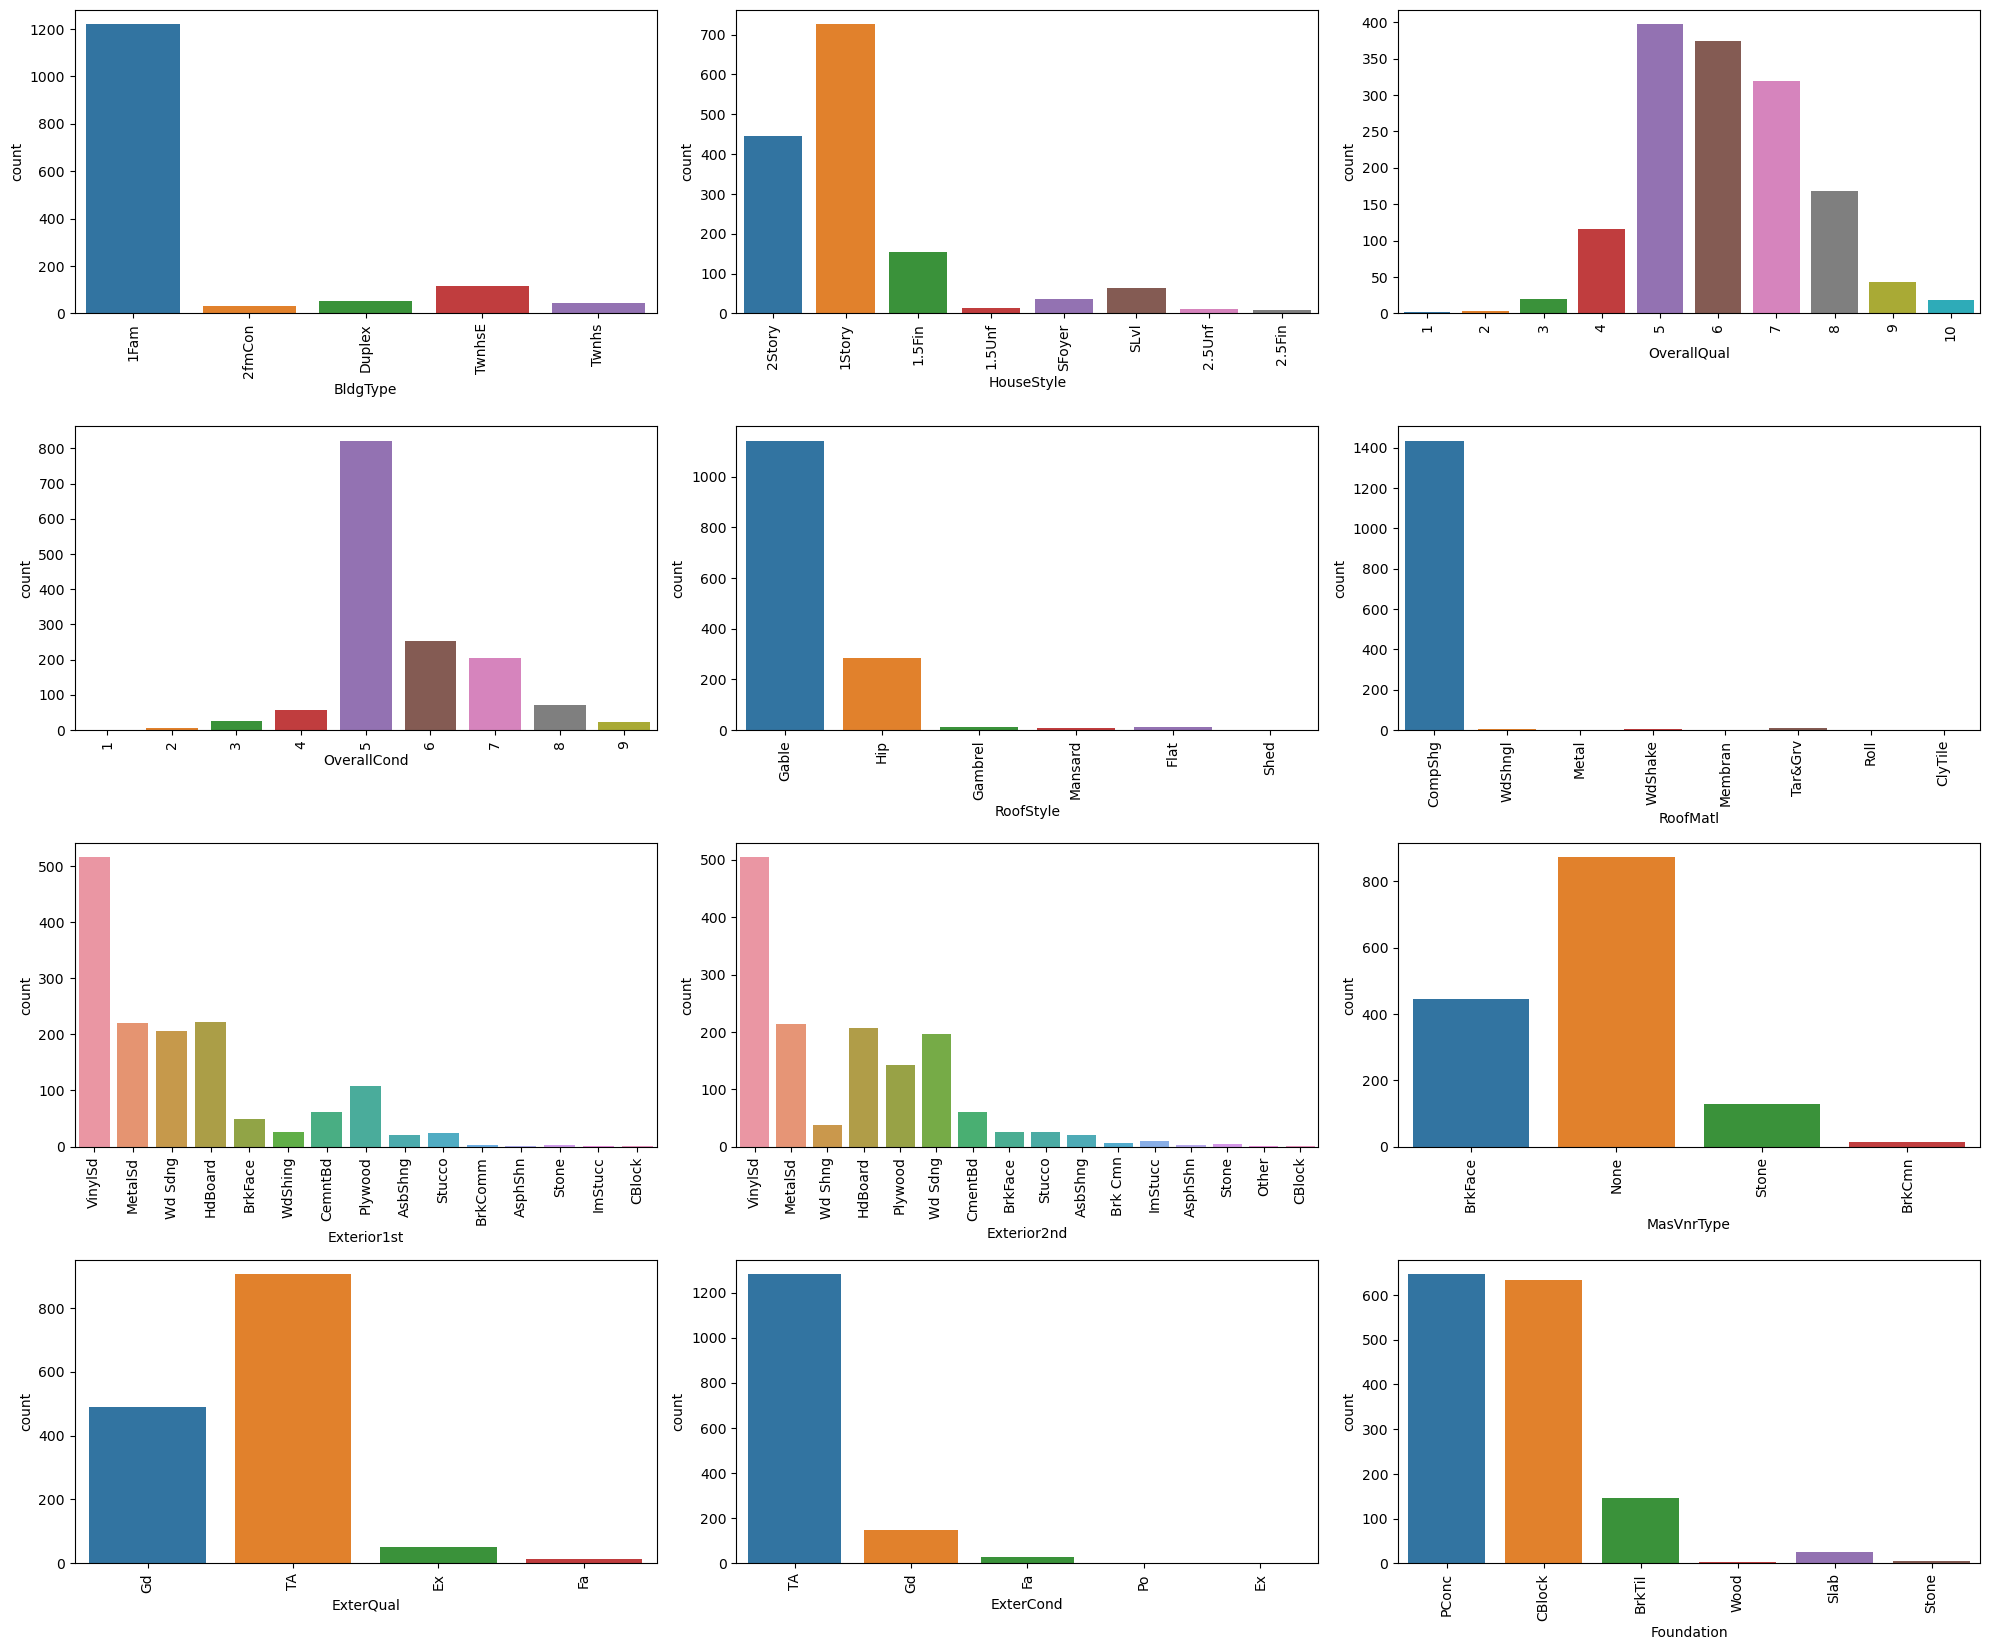

In [29]:
countplt(feature_list_2)

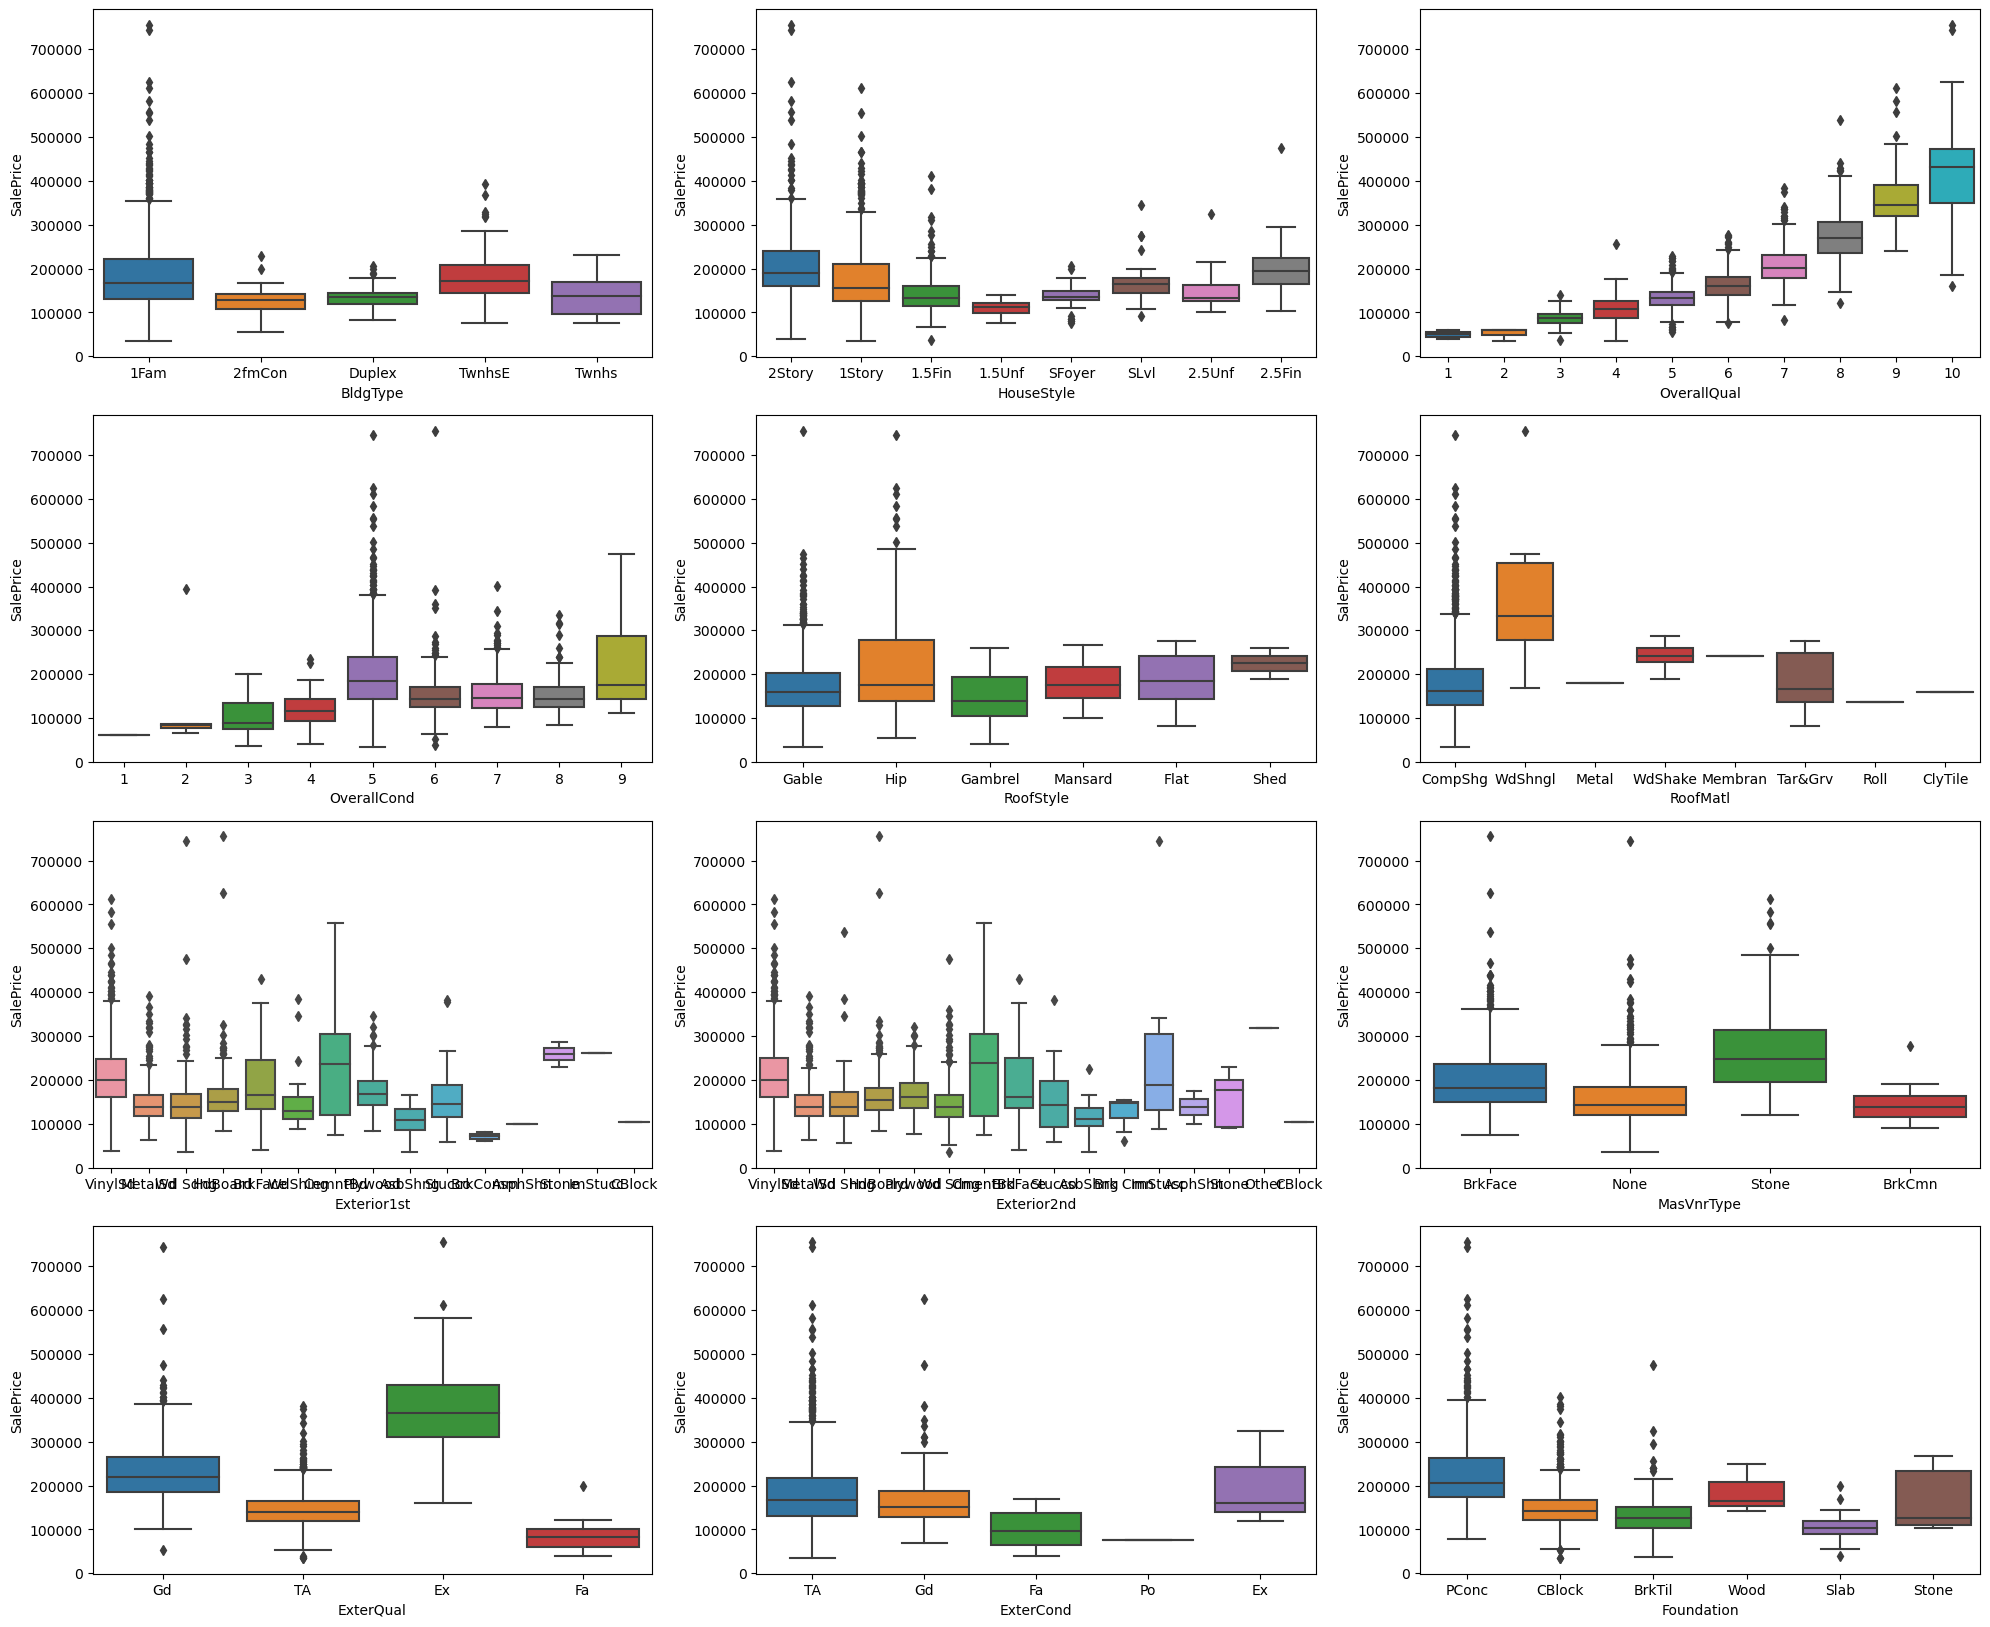

In [30]:
boxplt(feature_list_2)

In [31]:
# Dropping ExterCond as columns have one highly dominant value and 
# Much variation is not seen in boxplot with SalePrice
housing_data.drop(['ExterCond'], axis=1,inplace = True)

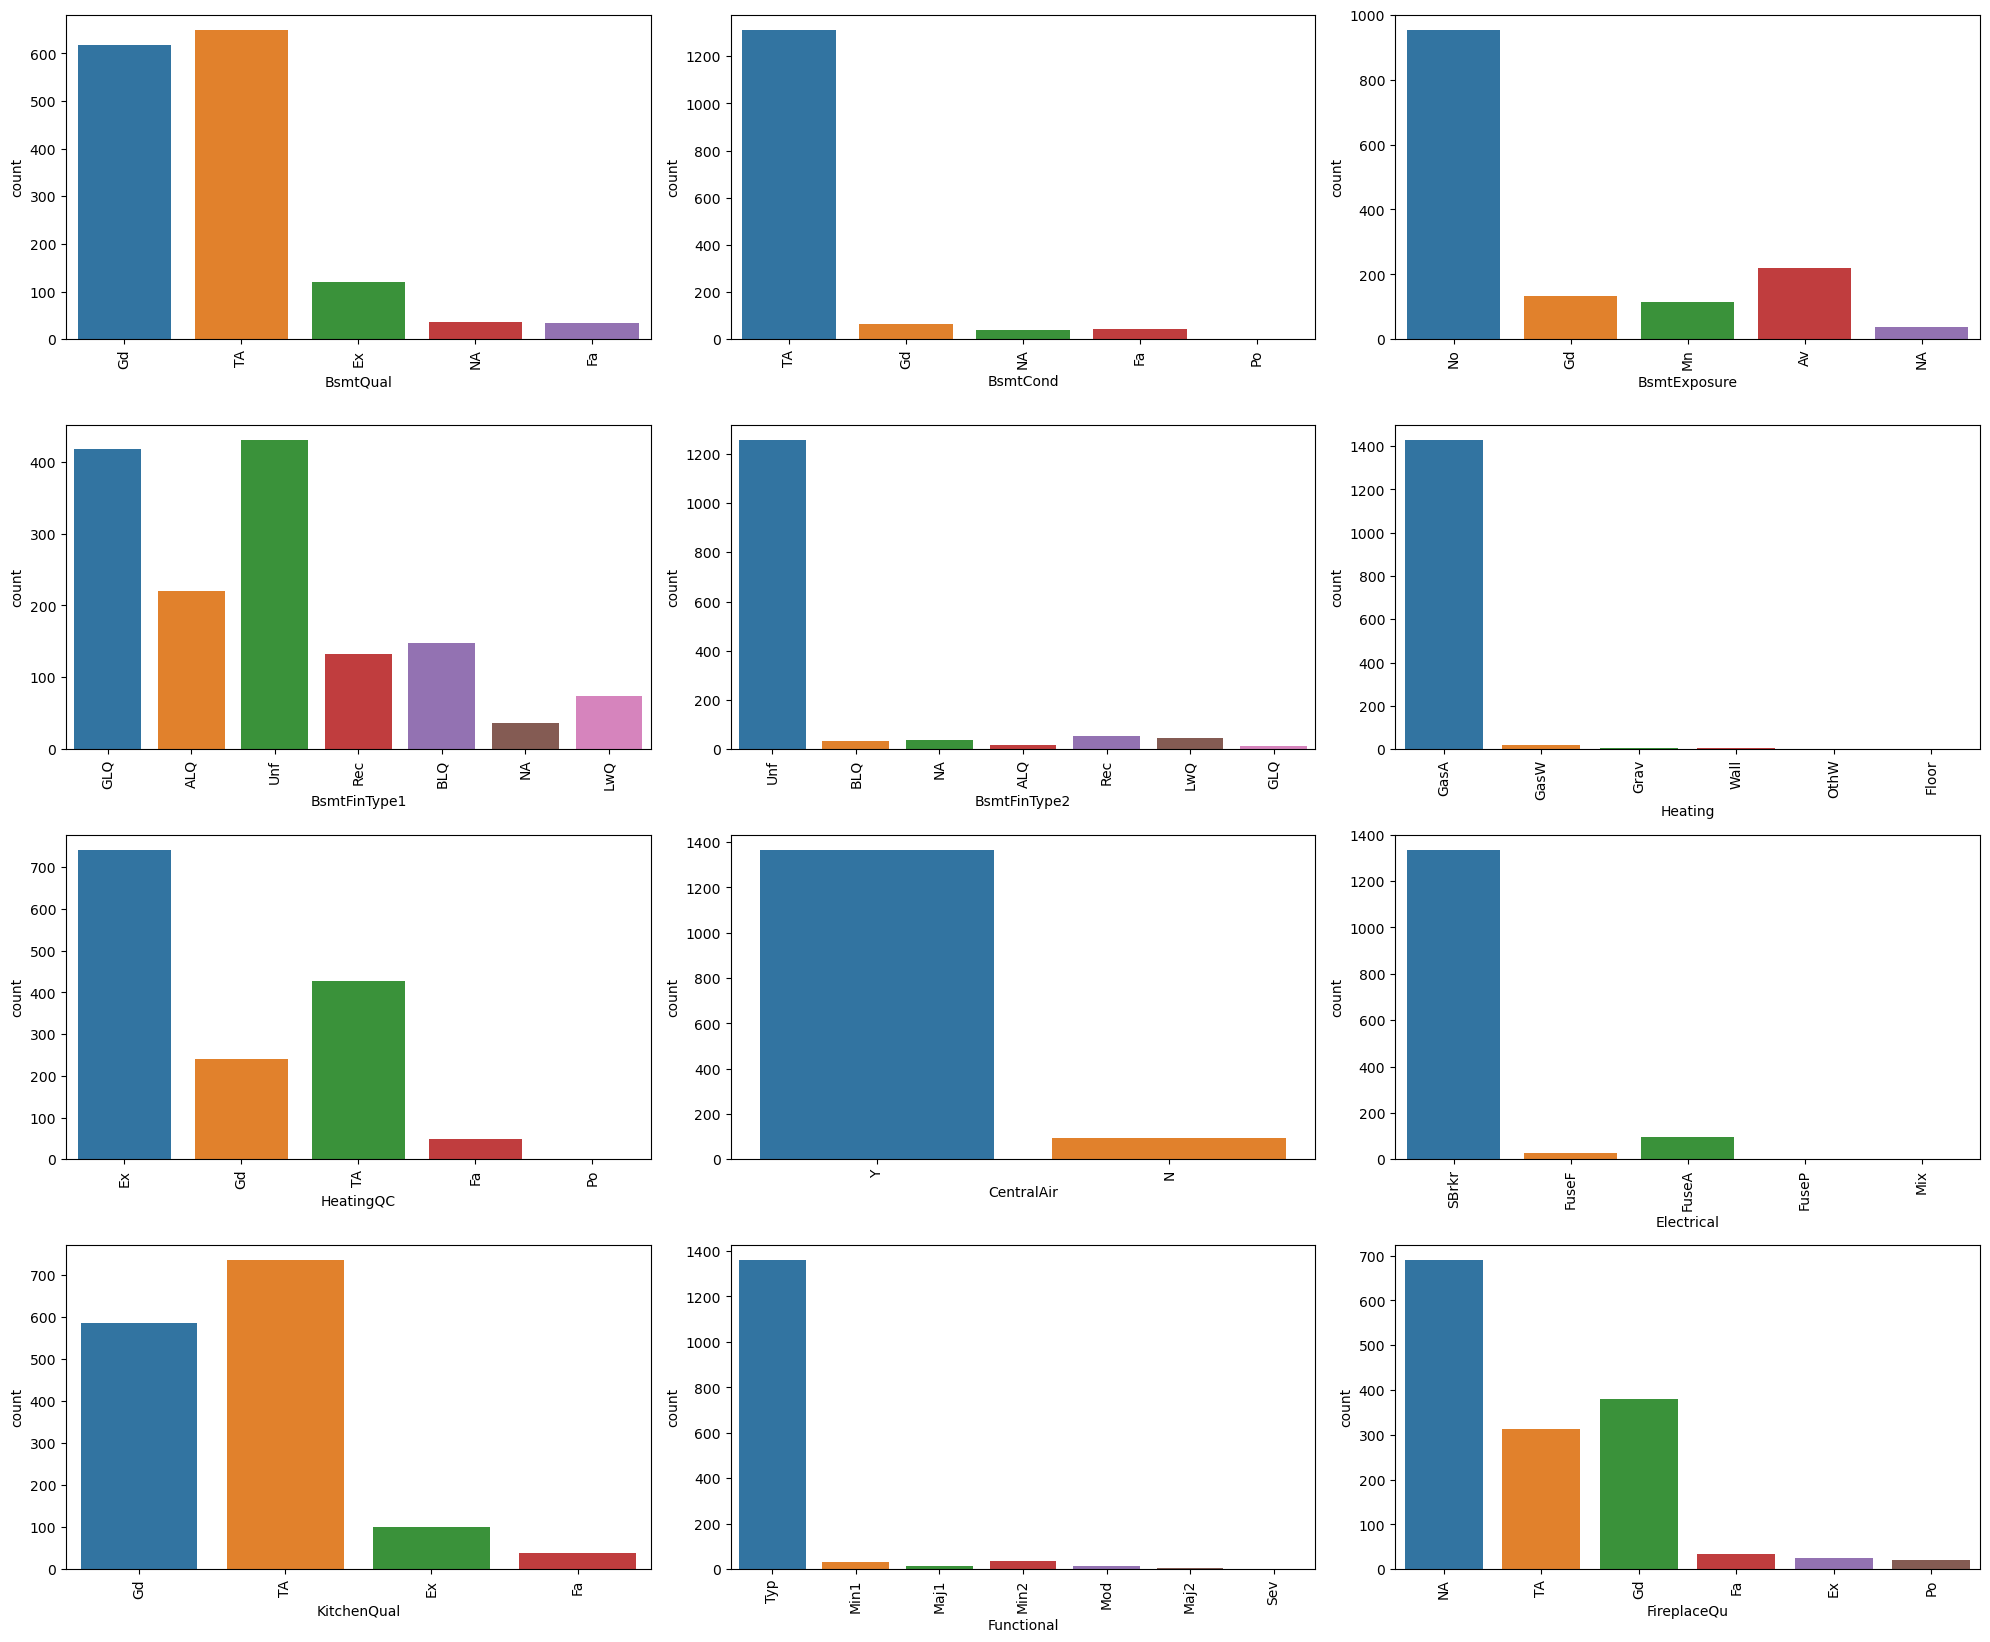

In [32]:
countplt(feature_list_3)

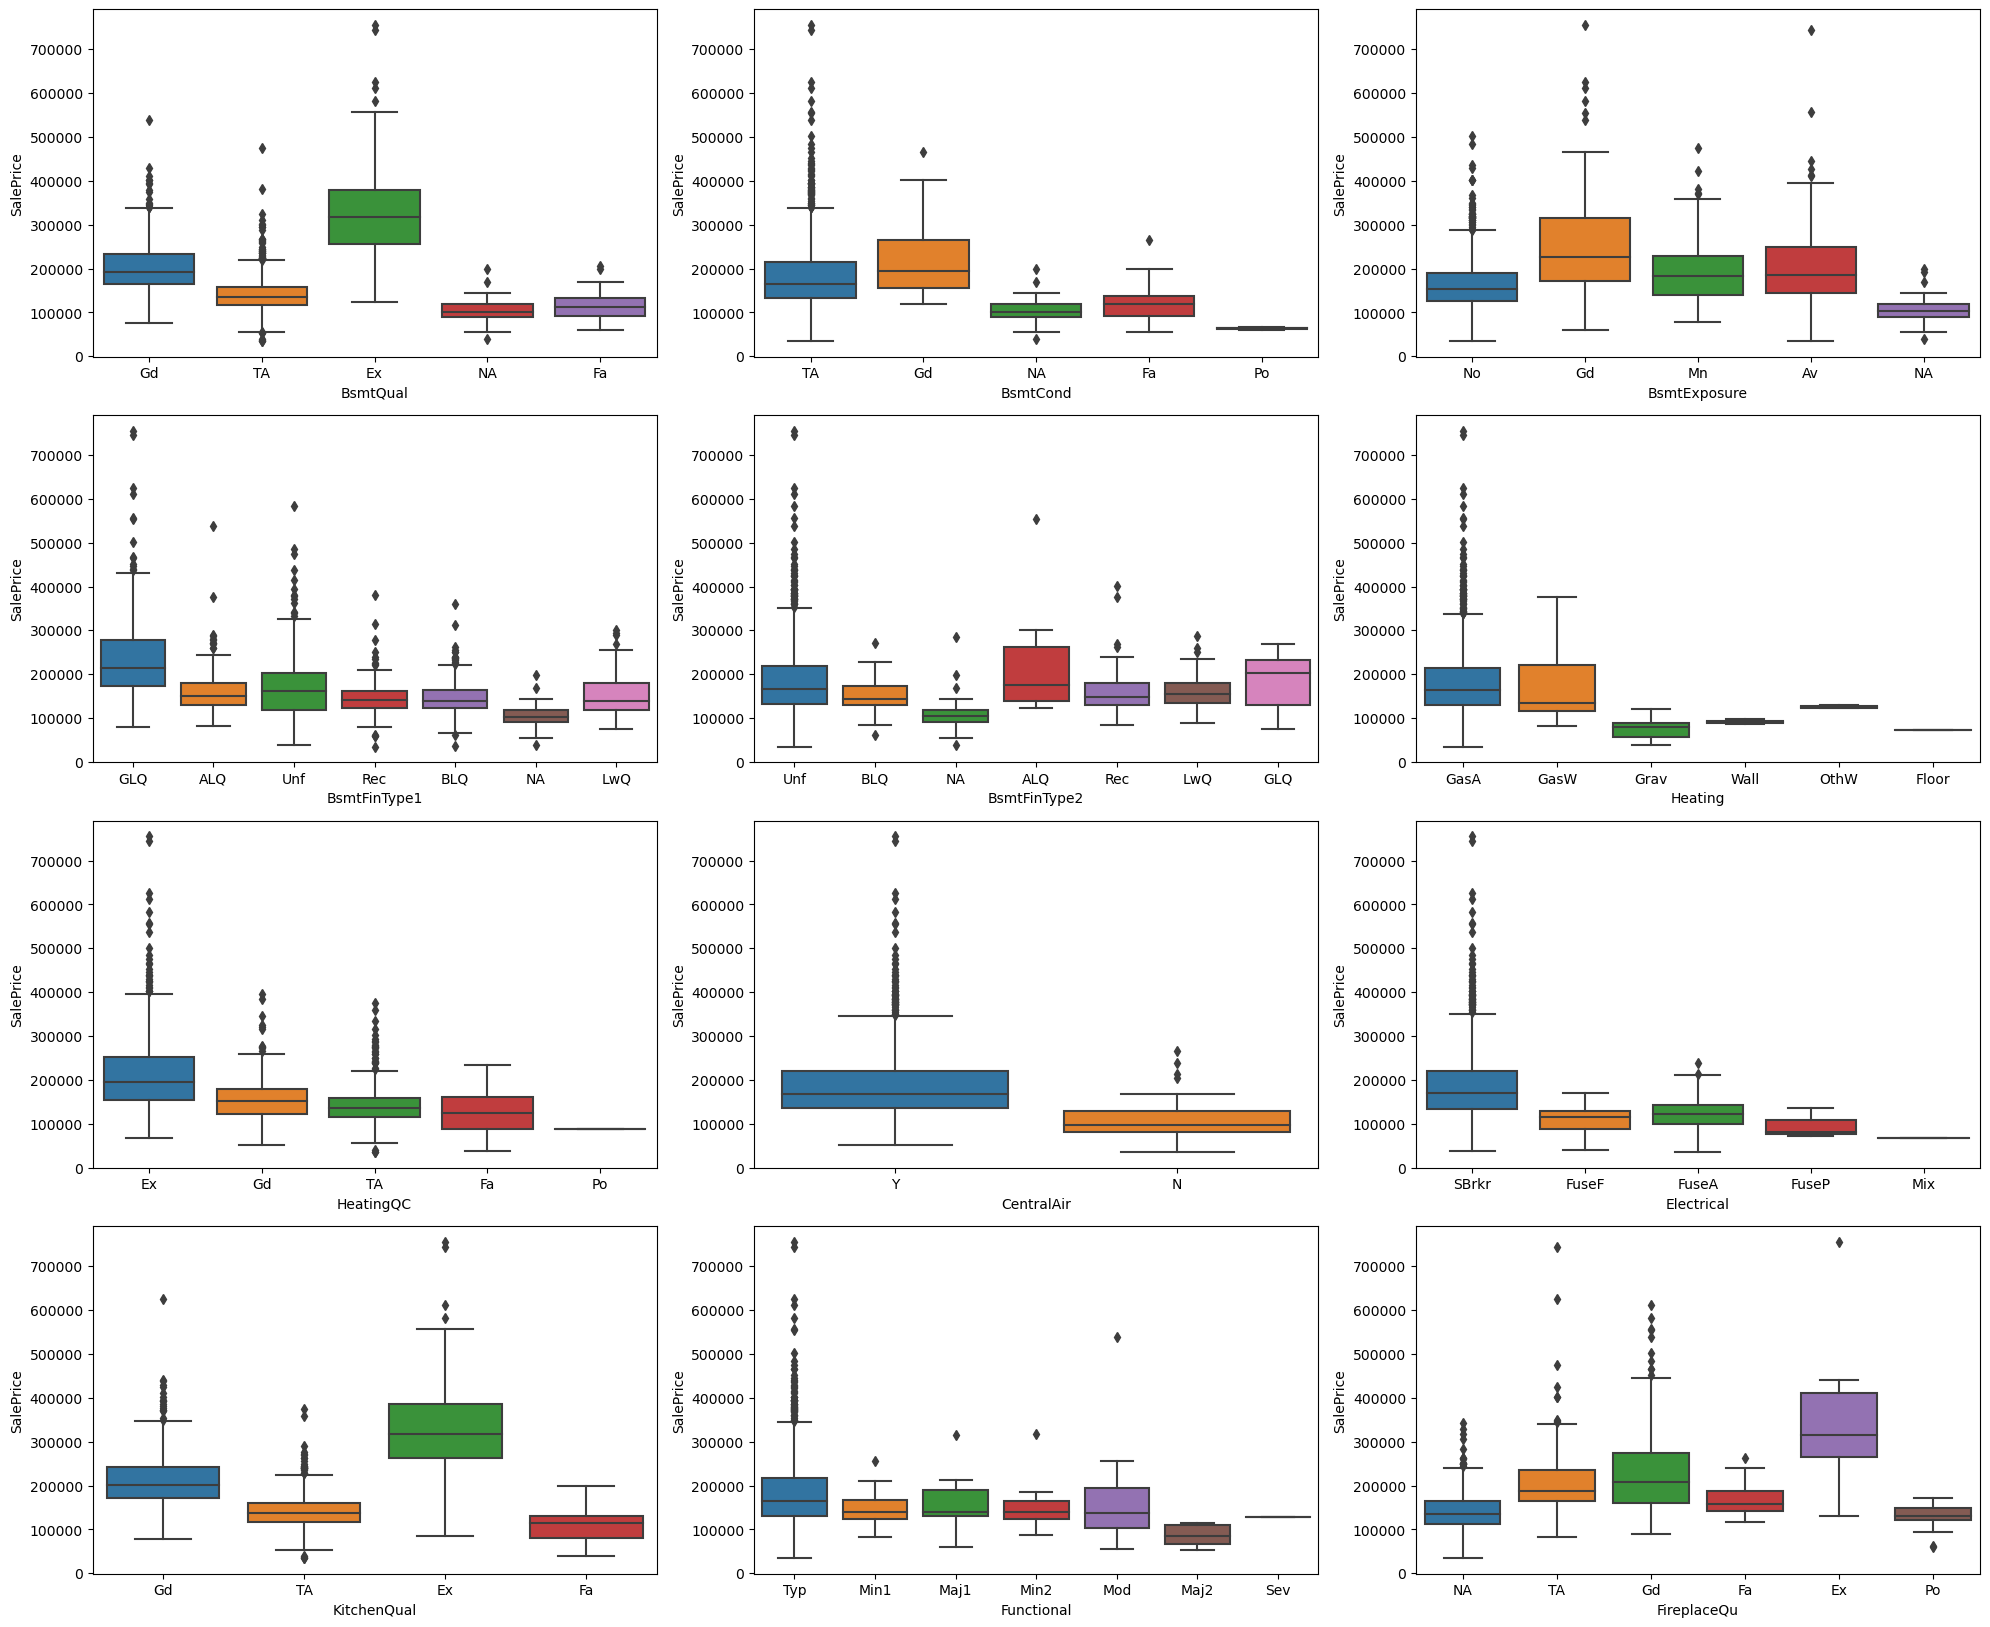

In [33]:
boxplt(feature_list_3)

In [34]:
# Dropping CentralAir and Functional as columns have one highly dominant value and 
# Much variation is not seen in boxplot with SalePrice
housing_data.drop(['CentralAir','Functional'], axis=1,inplace = True)

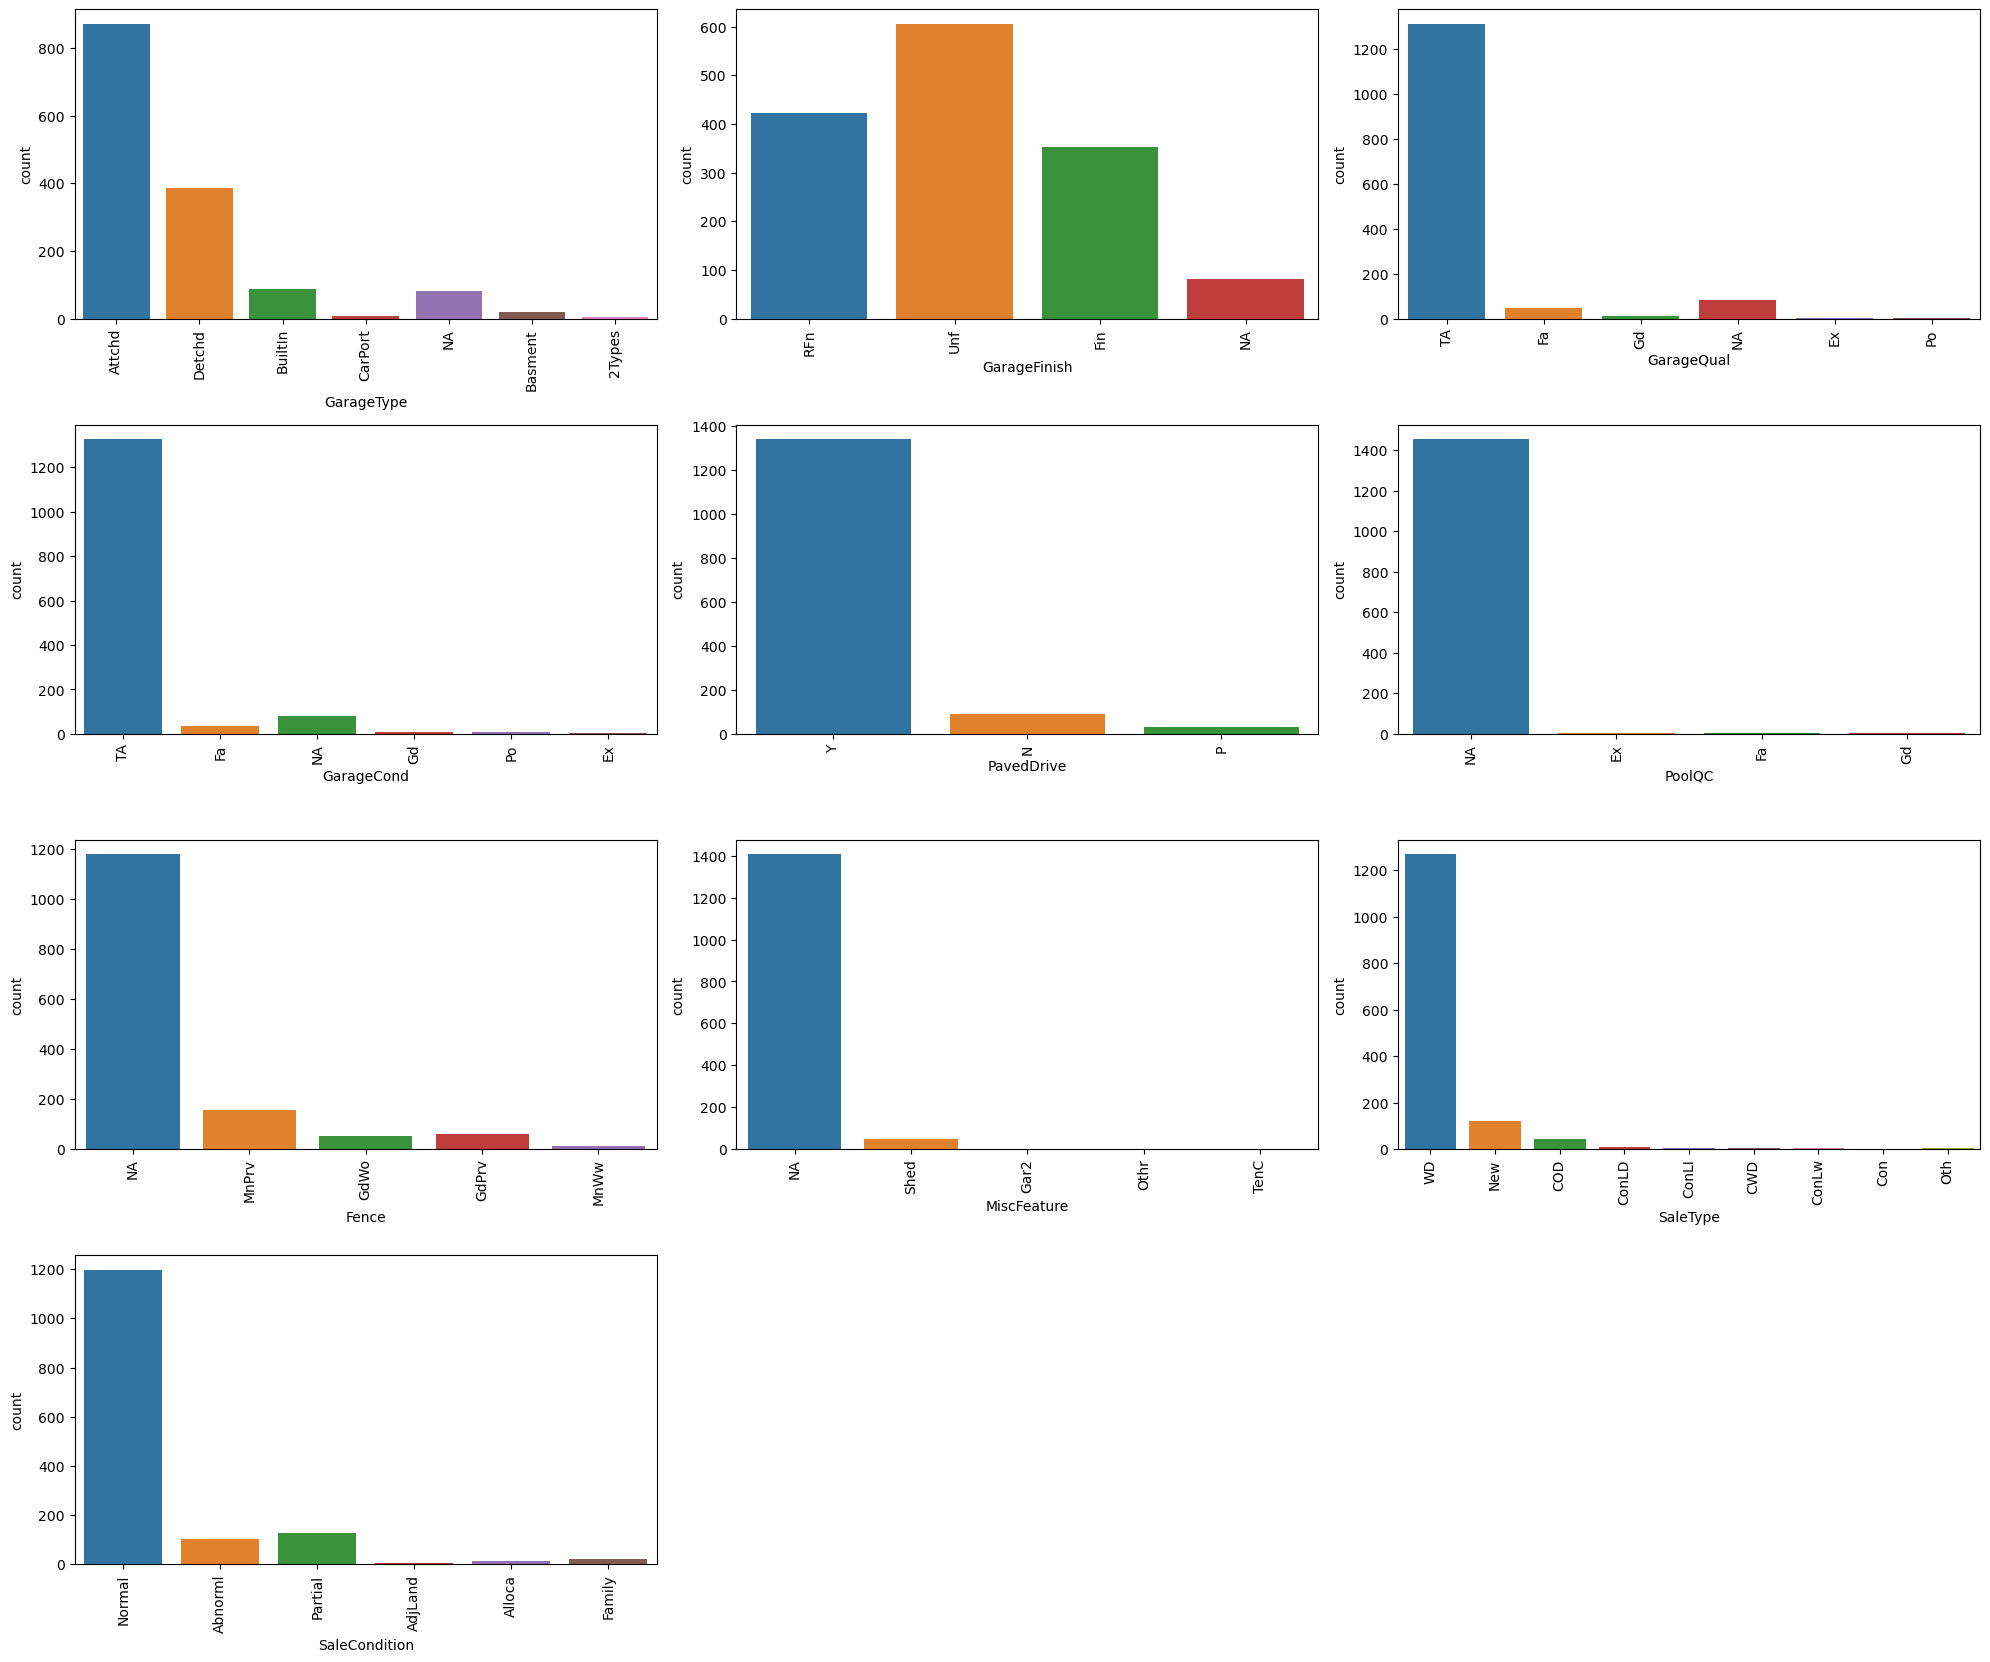

In [35]:
countplt(feature_list_4)

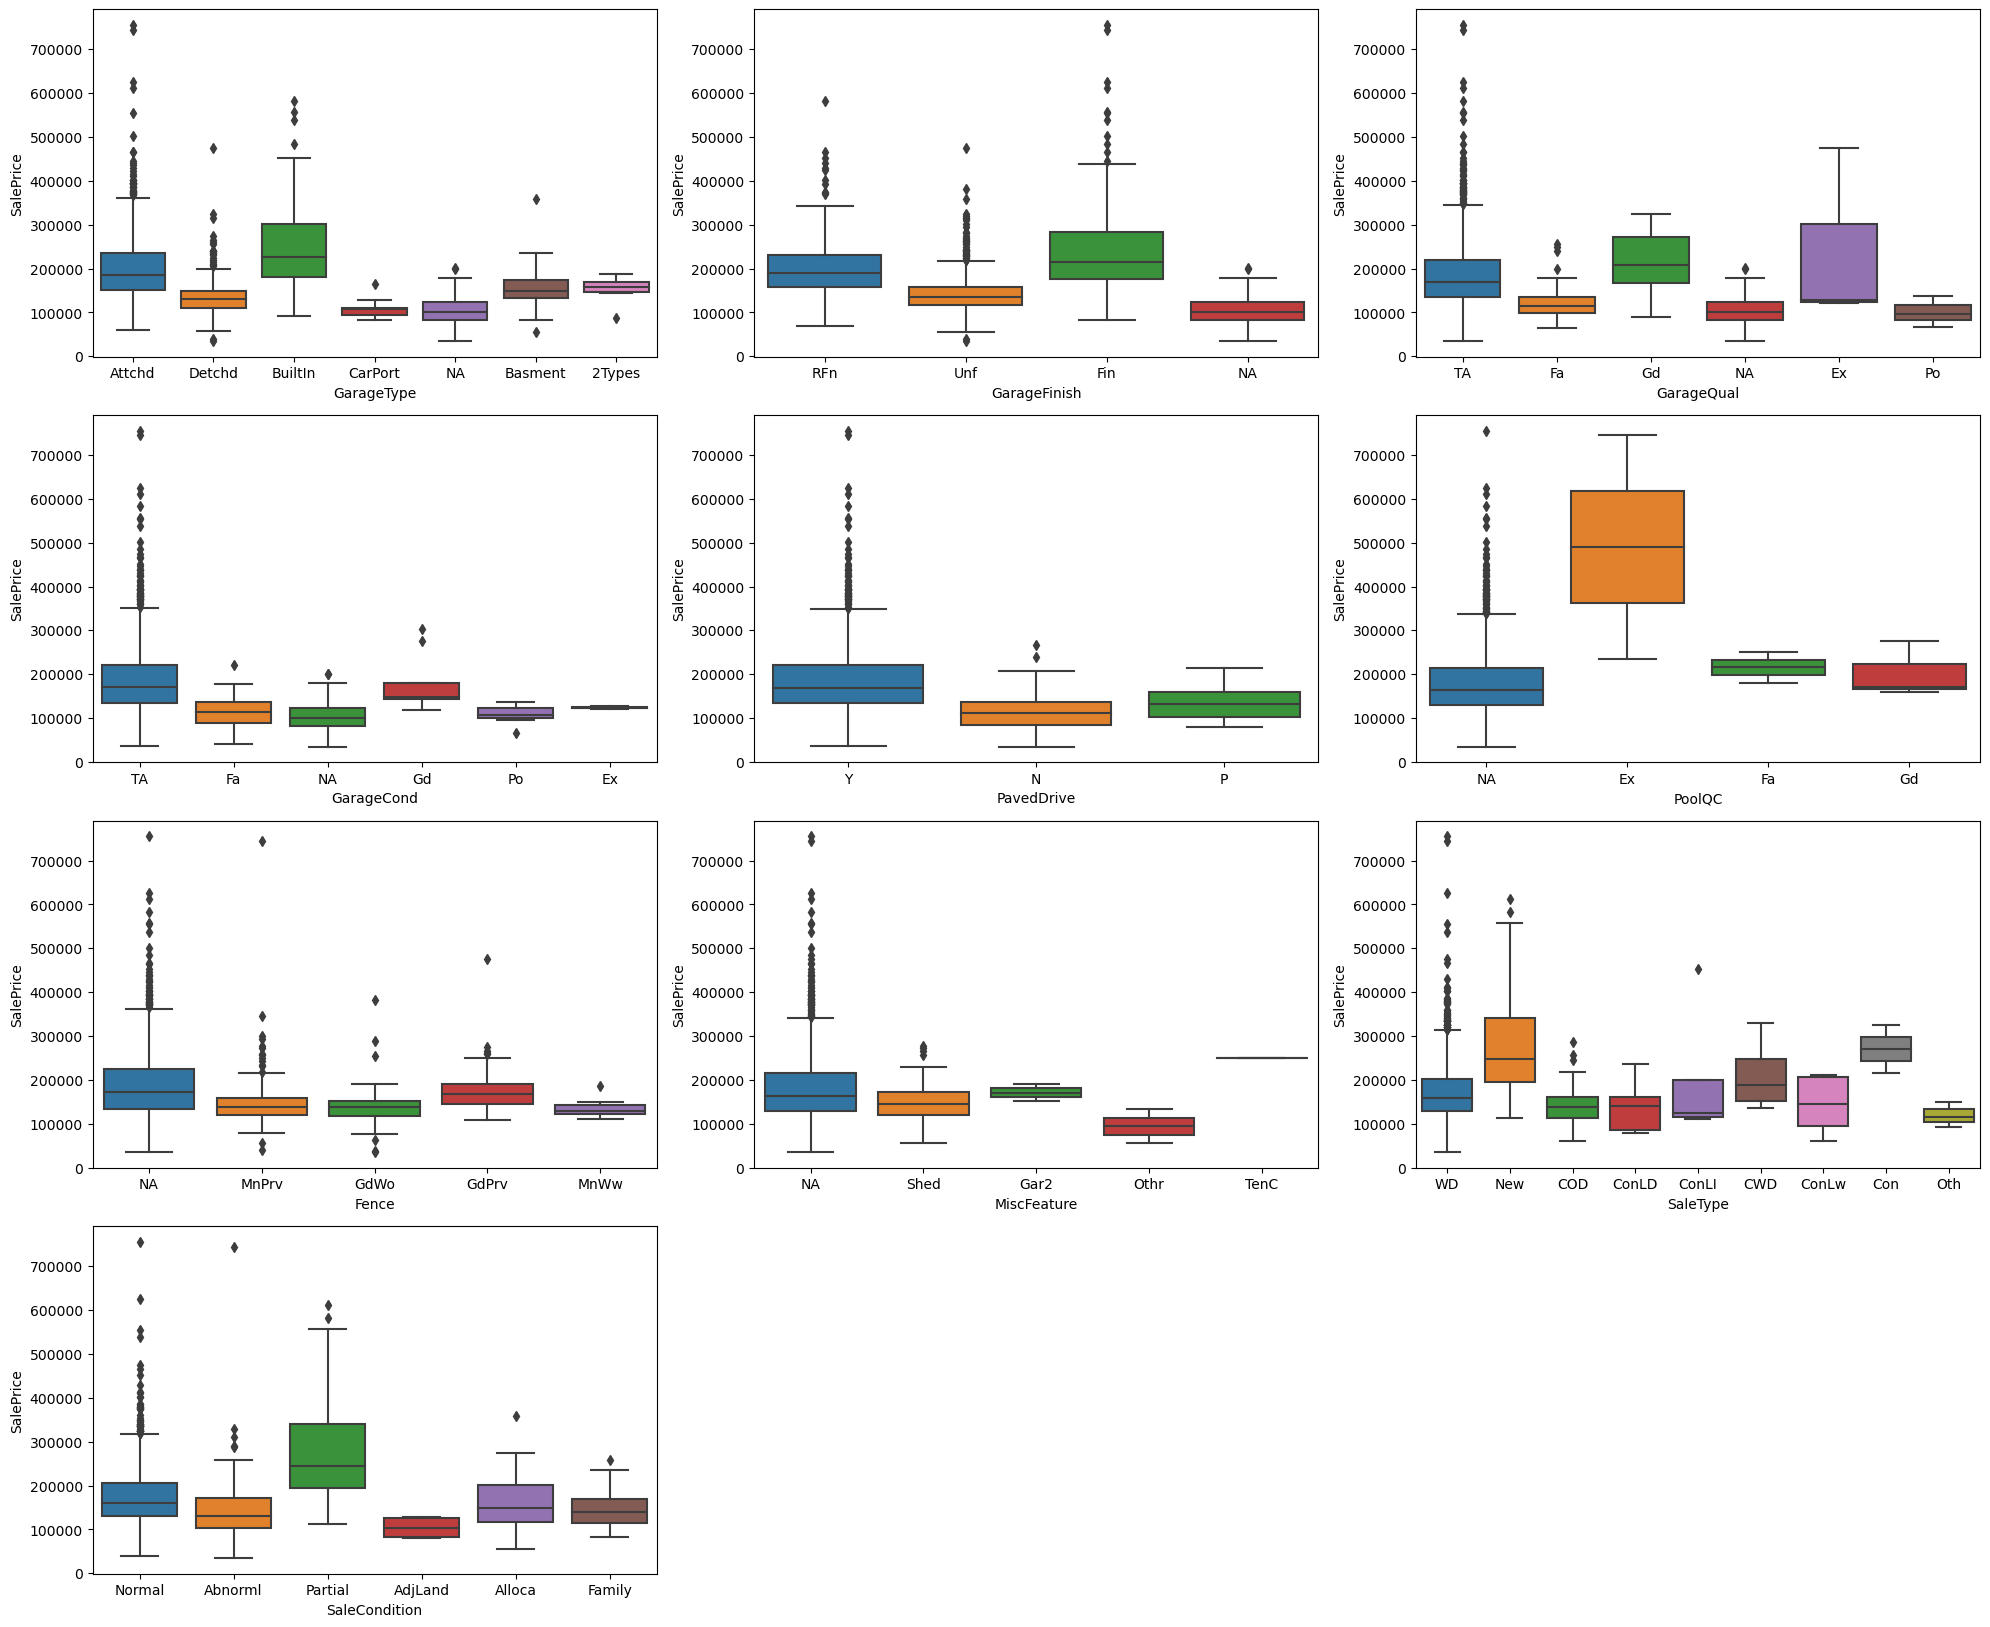

In [36]:
boxplt(feature_list_4)

In [37]:
# Dropping GarageCond and MiscFeature as columns have one highly dominant value and 
# Much variation is not seen in boxplot with SalePrice
housing_data.drop(['GarageCond','MiscFeature'], axis=1,inplace = True)

### Segmented Bivariate Analysis

In [38]:
# Analyzing PoolQc and PoolArea
housing_data[housing_data['PoolQC'].notnull() | housing_data['PoolArea'] > 0 ]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,Yrs_since_remod
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856,GasA,Ex,SBrkr,856.0,854,1710.0,1.0,2,1,3.0,Gd,8,0.0,NA,Attchd,RFn,2.0,548.0,TA,Y,0,61,0,NA,NA,2,2008,WD,Normal,208500,20,20
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262,GasA,Ex,SBrkr,1262.0,0,1262.0,0.0,2,0,3.0,TA,6,1.0,TA,Attchd,RFn,2.0,460.0,TA,Y,298,0,0,NA,NA,5,2007,WD,Normal,181500,47,47
2,60,RL,68.0,11250.0,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920,GasA,Ex,SBrkr,920.0,866,1786.0,1.0,2,1,3.0,Gd,6,1.0,TA,Attchd,RFn,2.0,608.0,TA,Y,0,42,0,NA,NA,9,2008,WD,Normal,223500,22,21
3,70,RL,60.0,9550.0,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756,GasA,Gd,SBrkr,961.0,756,1717.0,1.0,1,0,3.0,Gd,7,1.0,Gd,Detchd,Unf,3.0,642.0,TA,Y,0,35,0,NA,NA,2,2006,WD,Abnorml,140000,108,53
4,60,RL,84.0,14260.0,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145,GasA,Ex,SBrkr,1145.0,1053,2198.0,1.0,2,1,4.0,Gd,9,1.0,TA,Attchd,RFn,3.0,836.0,TA,Y,192,84,0,NA,NA,12,2008,WD,Normal,250000,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,TA,No,Unf,0.0,Unf,953.0,953,GasA,Ex,SBrkr,953.0,694,1647.0,0.0,2,1,3.0,TA,7,1.0,TA,Attchd,RFn,2.0,460.0,TA,Y,0,40,0,NA,NA,8,2007,WD,Normal,175000,24,23
1456,20,RL,85.0,13175.0,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,589.0,1542,GasA,TA,SBrkr,2073.0,0,2073.0,1.0,2,0,3.0,TA,7,2.0,TA,Attchd,Unf,2.0,500.0,TA,Y,349,0,0,NA,MnPrv,2,2010,WD,Normal,210000,45,35
1457,70,RL,66.0,9042.0,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,Gd,No,GLQ,275.0,Unf,877.0,1152,GasA,Ex,SBrkr,1188.0,1152,2340.0,0.0,2,0,4.0,Gd,9,2.0,Gd,Attchd,RFn,1.0,252.0,TA,Y,0,60,0,NA,GdPrv,5,2010,WD,Normal,266500,82,17
1458,20,RL,68.0,9717.0,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,TA,Mn,GLQ,49.0,Rec,0.0,1078,GasA,Gd,FuseA,1078.0,0,1078.0,1.0,1,0,2.0,Gd,5,0.0,NA,Attchd,Unf,1.0,240.0,TA,Y,366,0,0,NA,NA,4,2010,WD,Normal,142125,73,27


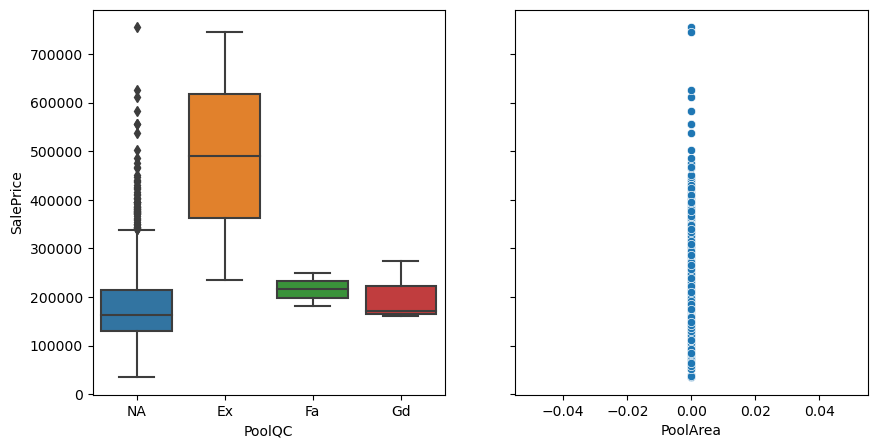

In [39]:
fig, axes = plt.subplots(1,2,sharey =True, figsize = (10,5))
sns.boxplot(ax = axes[0], y = housing_data.SalePrice, x = housing_data.PoolQC)
sns.scatterplot(ax =axes[1], y = housing_data.SalePrice, x = housing_data.PoolArea)
plt.show()

In [40]:
# As seen in box plot, no firm relationship between pool area and Sale Price hence dropping column PoolArea
housing_data.drop('PoolArea',axis = 1,inplace = True)

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

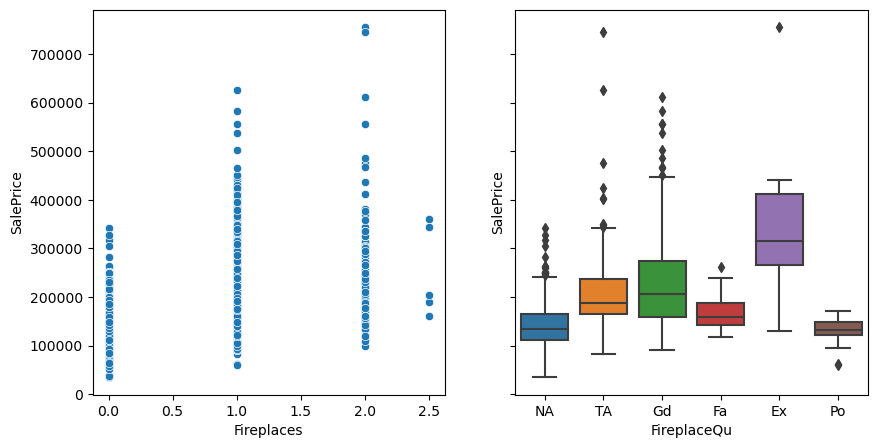

In [41]:
# Analyzing Fireplaces and FireplaceQu
fig, axes = plt.subplots(1,2,sharey =True, figsize = (10,5))
sns.scatterplot(ax = axes[0], y = housing_data.SalePrice, x = housing_data.Fireplaces)

sns.boxplot(ax = axes[1], y = housing_data.SalePrice, x = housing_data.FireplaceQu)

In [42]:
# Analyzing MasVnrType and MasVnrArea

housing_data[housing_data['MasVnrType'].notnull() | housing_data['MasVnrArea'] > 0 ].head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,Yrs_since_remod
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856,GasA,Ex,SBrkr,856.0,854,1710.0,1.0,2,1,3.0,Gd,8,0.0,NA,Attchd,RFn,2.0,548.0,TA,Y,0,61,NA,NA,2,2008,WD,Normal,208500,20,20
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262,GasA,Ex,SBrkr,1262.0,0,1262.0,0.0,2,0,3.0,TA,6,1.0,TA,Attchd,RFn,2.0,460.0,TA,Y,298,0,NA,NA,5,2007,WD,Normal,181500,47,47
2,60,RL,68.0,11250.0,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920,GasA,Ex,SBrkr,920.0,866,1786.0,1.0,2,1,3.0,Gd,6,1.0,TA,Attchd,RFn,2.0,608.0,TA,Y,0,42,NA,NA,9,2008,WD,Normal,223500,22,21
3,70,RL,60.0,9550.0,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756,GasA,Gd,SBrkr,961.0,756,1717.0,1.0,1,0,3.0,Gd,7,1.0,Gd,Detchd,Unf,3.0,642.0,TA,Y,0,35,NA,NA,2,2006,WD,Abnorml,140000,108,53
4,60,RL,84.0,14260.0,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145,GasA,Ex,SBrkr,1145.0,1053,2198.0,1.0,2,1,4.0,Gd,9,1.0,TA,Attchd,RFn,3.0,836.0,TA,Y,192,84,NA,NA,12,2008,WD,Normal,250000,23,23
5,50,RL,85.0,14115.0,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,64.0,796,GasA,Ex,SBrkr,796.0,566,1362.0,1.0,1,1,1.0,TA,5,0.0,NA,Attchd,Unf,2.0,480.0,TA,Y,40,30,NA,MnPrv,10,2009,WD,Normal,143000,30,28
6,20,RL,75.0,10084.0,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,PConc,Ex,TA,Av,GLQ,1369.0,Unf,317.0,1686,GasA,Ex,SBrkr,1694.0,0,1694.0,1.0,2,0,3.0,Gd,7,1.0,Gd,Attchd,RFn,2.0,636.0,TA,Y,255,57,NA,NA,8,2007,WD,Normal,307000,19,18
7,60,RL,NaN,10382.0,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,216.0,1107,GasA,Ex,SBrkr,1107.0,983,2090.0,1.0,2,1,3.0,TA,7,2.0,TA,Attchd,RFn,2.0,484.0,TA,Y,235,170,NA,NA,11,2009,WD,Normal,200000,50,50
8,50,RM,51.0,6120.0,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,952.0,952,GasA,Gd,FuseF,1022.0,752,1774.0,0.0,2,0,2.0,TA,8,2.0,TA,Detchd,Unf,2.0,468.0,Fa,Y,90,0,NA,NA,4,2008,WD,Abnorml,129900,92,73
9,190,RL,50.0,7420.0,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,140.0,991,GasA,Ex,SBrkr,1077.0,0,1077.0,1.0,1,0,2.0,TA,5,2.0,TA,Attchd,RFn,1.0,205.0,Gd,Y,0,4,NA,NA,1,2008,WD,Normal,118000,84,73


<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

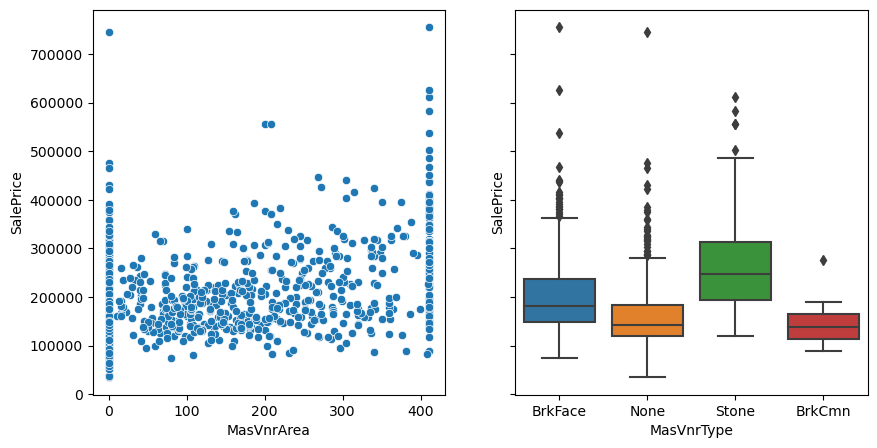

In [43]:
fig, axes = plt.subplots(1,2,sharey =True, figsize = (10,5))
sns.scatterplot(ax = axes[0], y = housing_data.SalePrice, x = housing_data.MasVnrArea)

sns.boxplot(ax = axes[1], y = housing_data.SalePrice, x = housing_data.MasVnrType)

In [44]:
num_vars = [feature for feature in housing_data.columns if housing_data[feature].dtype != "O"]

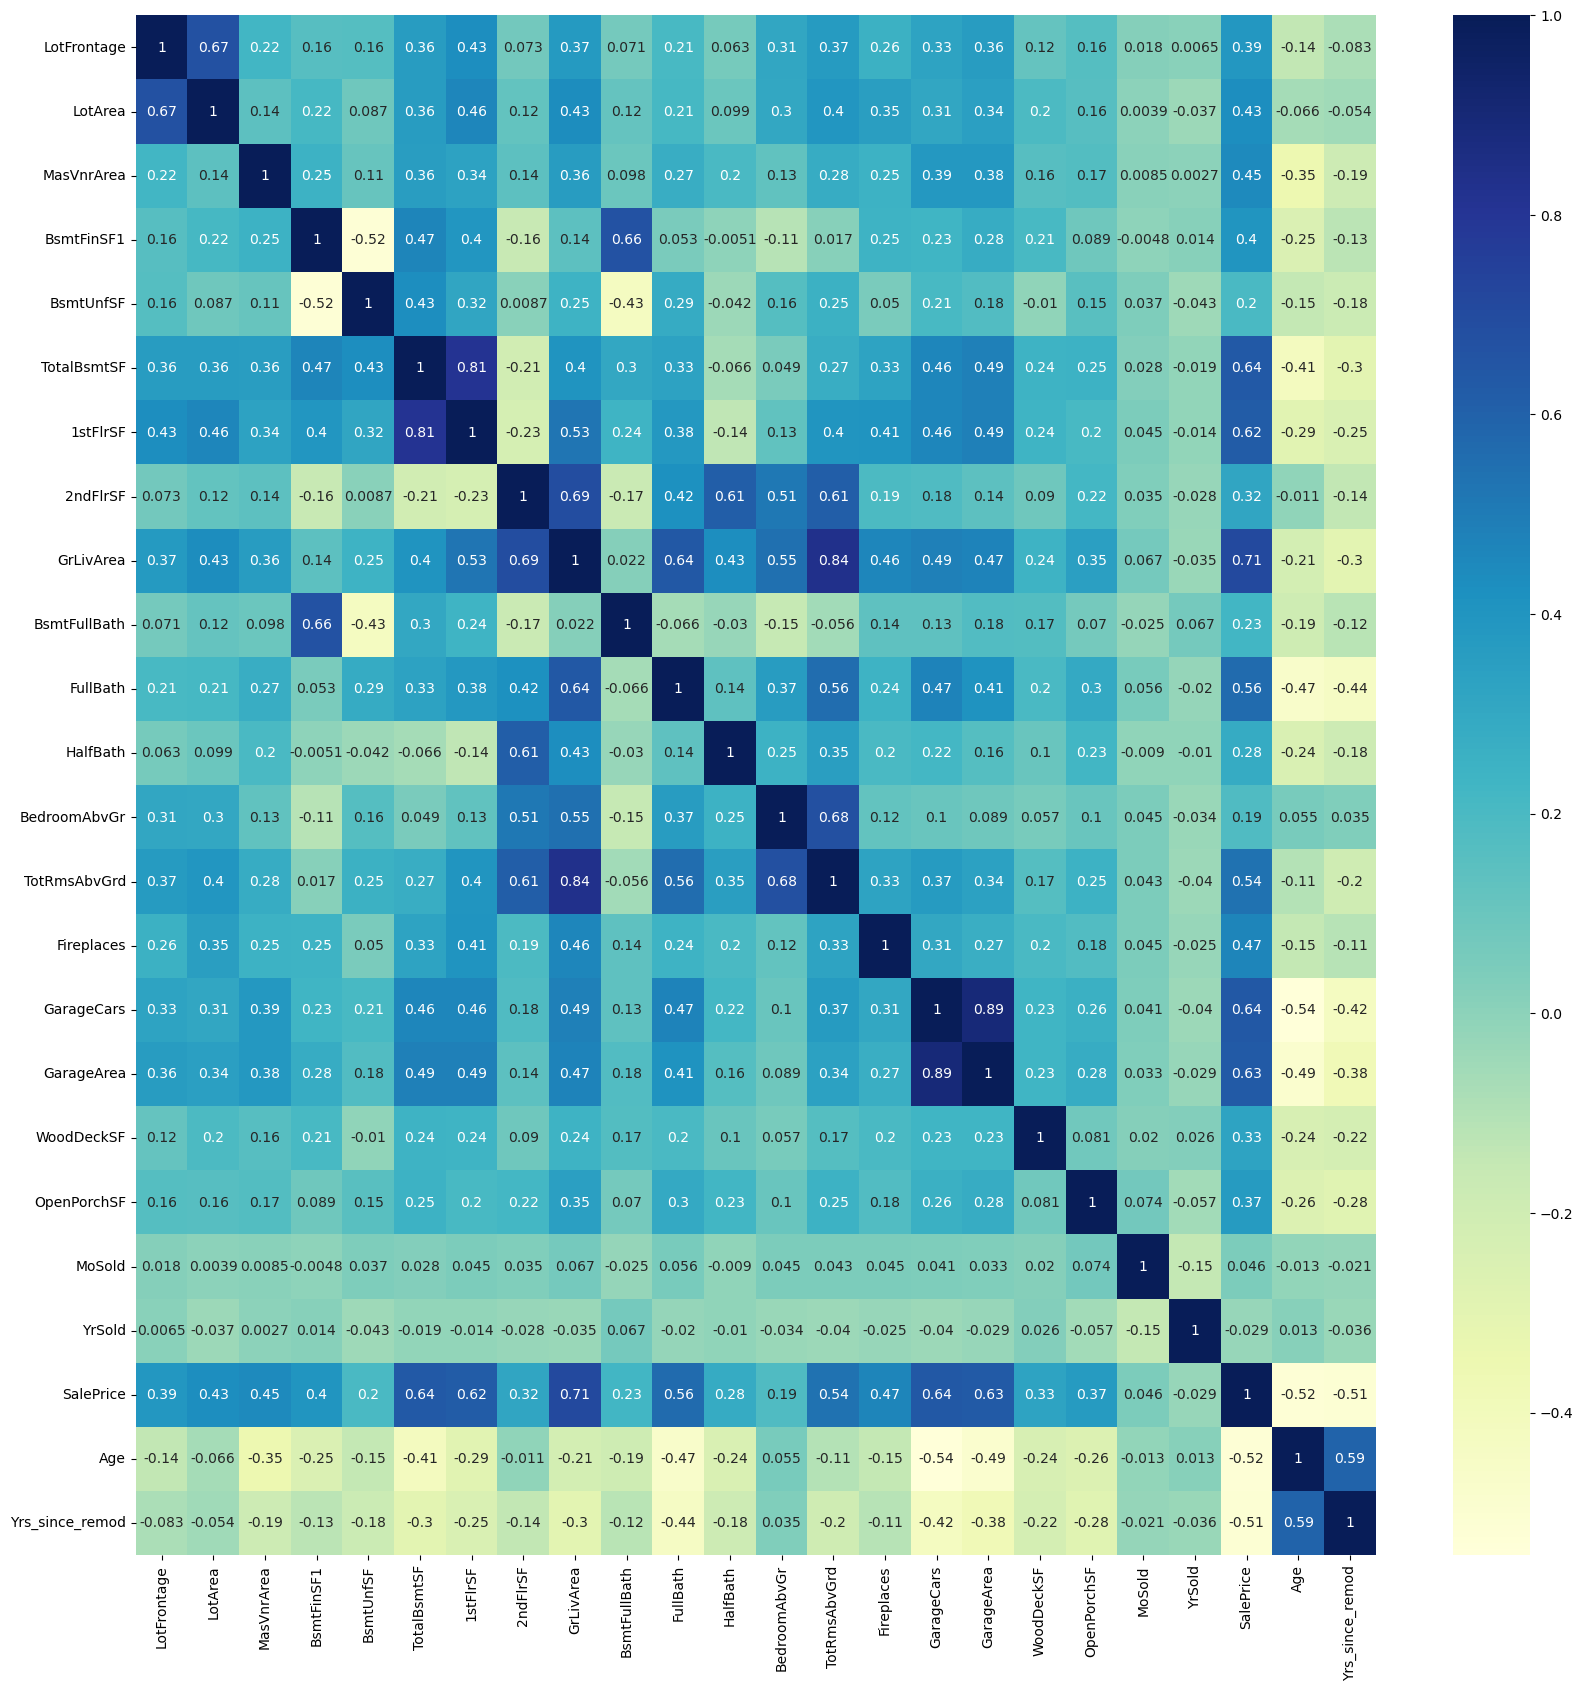

In [45]:
# correlation matrix
cor = housing_data[num_vars].corr()

# plotting correlations on a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [46]:
#select upper traingle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [feature for feature in upper.columns if any(upper[feature] > 0.8)]
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [47]:
housing_data.drop(to_drop, axis=1, inplace = True)

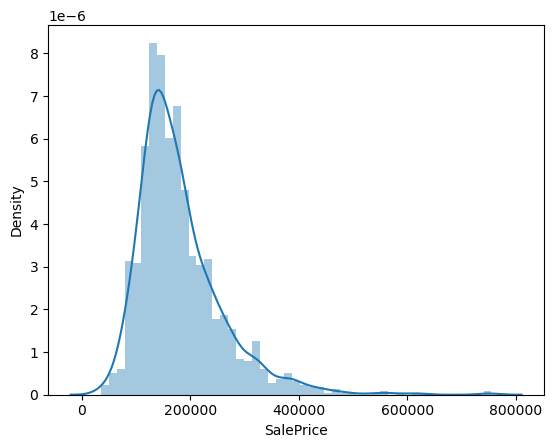

Skewness: 1.882876


In [48]:
sns.distplot(housing_data['SalePrice'])
plt.show()
print("Skewness: %f" % housing_data['SalePrice'].skew())

In [49]:
housing_data['SalePrice']=np.log(housing_data.SalePrice) #tranforming to form normal disribution

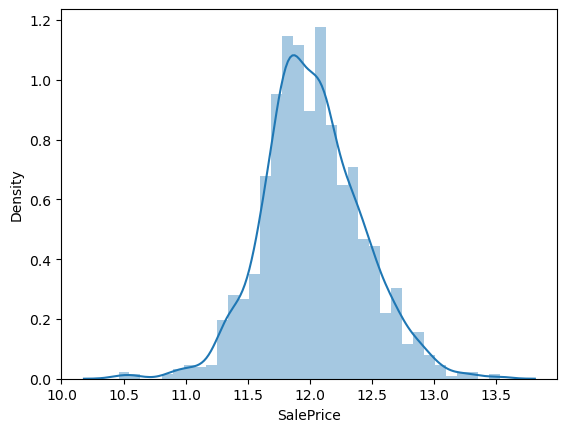

Skewness: 0.121335


In [50]:
sns.distplot(housing_data['SalePrice'])
plt.show()
print("Skewness: %f" % housing_data['SalePrice'].skew())

In [51]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   float64
 4   LotShape         1460 non-null   object 
 5   LandContour      1460 non-null   object 
 6   LotConfig        1460 non-null   object 
 7   LandSlope        1460 non-null   object 
 8   Neighborhood     1460 non-null   object 
 9   Condition1       1460 non-null   object 
 10  Condition2       1460 non-null   object 
 11  BldgType         1460 non-null   object 
 12  HouseStyle       1460 non-null   object 
 13  OverallQual      1460 non-null   object 
 14  OverallCond      1460 non-null   object 
 15  RoofStyle        1460 non-null   object 
 16  RoofMatl         1460 non-null   object 
 17  Exterior1st   

In [52]:
# Updating features
cat_vars = [feature for feature in  housing_data.columns if housing_data[feature].dtype == 'O']
num_vars = [feature for feature in  housing_data.columns if housing_data[feature].dtype != 'O']

In [53]:
#Its time to get dummies for all other categorical variables
housing_dummy = pd.get_dummies(housing_data[cat_vars], drop_first=True, dtype = int)

In [54]:
housing_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [55]:
#Concating the dataframe with dummies with the the original dataframe
housing_model = pd.concat([housing_data, housing_dummy], axis=1)

In [56]:
housing_model.drop(cat_vars, axis = 1, inplace =True)

In [57]:
housing_model.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,Age,Yrs_since_remod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,196.0,706.0,150.0,856,854,1710.0,

In [58]:
X = housing_model.drop('SalePrice', axis=1)
y = housing_model['SalePrice']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 250)
X_test Shape: (438, 250)
y_train Shape: (1021,)
y_test Shape: (438,)


In [60]:
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
 
# Imputer object using the median strategy and 
# missing_values type for imputation
si = SimpleImputer(missing_values = np.nan, strategy ='median')
si.fit(X_train[['LotFrontage']])

SimpleImputer(strategy='median')

In [61]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [62]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [63]:
scaler = StandardScaler()

In [64]:
num_vars.remove('SalePrice')
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Age,Yrs_since_remod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.088331,-1.117166,-0.662880,0.057374,-0.375237,-0.4

In [65]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting Sale prices, a dataset using linear regression.

In [66]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-57937183182.68927
[ 4.08648161e-03  2.94298034e-02  4.75328901e-03  1.89304624e-02
 -1.55510535e-03  6.67532013e-02  4.14077692e-02  9.12337944e-02
  1.64637348e-02  1.20686443e-02  4.87247897e-03 -2.73994182e-03
  6.01217132e-03  3.06025126e-02  9.19504617e-03  8.17109249e-03
 -3.13594113e-04 -3.61358209e-03 -6.16202437e-02 -2.50026129e-02
 -9.24344224e-02 -1.36536714e-01 -2.03154391e-01 -1.15960755e-02
 -1.11962756e-02  4.73795360e-02 -1.53525828e-01 -3.63821347e-02
  2.69769006e-03 -1.13024646e+10 -7.08306180e-04 -6.80917655e-02
 -5.39481836e-02  1.02097464e+09  4.81009796e-01  4.61450121e-01
  4.36718122e-01  3.84729408e-01  7.89095105e-03  5.38705940e-02
  8.77964439e-03 -2.29024541e-02 -1.01188377e-02  8.09871263e-03
  2.29915344e-02 -4.12055582e-02 -1.18403346e-02 -6.06159333e-03
  2.29939008e-02  2.76953678e-02  8.72053551e-02  2.75159468e-02
  8.99376268e-02  6.98872685e-02  1.94031964e-02  1.40022336e-01
 -2.43560956e-02  2.48067816e-02  6.43781812e-02 -1.14961024e-01
 -2.22

In [68]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9575780053231985
-7.724080892457158e+19
6.808401048492826
5.566634725111046e+21
0.006668365375605118
1.2709211701166772e+19


### Ridge and Lasso Regression
Let's now try predicting Sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [69]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [71]:
#Fitting Ridge model for alpha = 7.0 and printing coefficients which have been penalised
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00534967  0.02825152  0.00080793  0.01117715 -0.01661743  0.07530435
  0.04037141  0.09872607  0.01167335  0.01482648  0.00744541  0.00126263
  0.0124221   0.03266366  0.01013013  0.00738964 -0.00094722 -0.00483943
 -0.05407095 -0.03291714 -0.06341717 -0.01404599  0.007492    0.00418978
 -0.0269453   0.06013495  0.01631837 -0.01171959  0.00172438 -0.02633277
  0.00447534 -0.03957236 -0.02225841 -0.02472509  0.07882402  0.06468335
  0.07102155  0.03728906  0.01254105 -0.03453975  0.00999995  0.03133995
  0.02125229  0.03272456  0.03152084 -0.03189117  0.00046775 -0.00314903
  0.0144533   0.00548875  0.0003792  -0.00497684  0.02850876  0.03340809
 -0.01051145  0.08634031 -0.07624238 -0.00685726 -0.06154905 -0.0643677
 -0.05081694 -0.01567053  0.01058206 -0.02747247  0.04725279  0.05472786
 -0.03693479  0.02440857 -0.04090498 -0.00091295  0.07202376  0.06826176
 -0.00255342  0.01765474  0.00618176  0.05112363  0.00997243 -0.00749036
 -0.04566442  0.01982919  0.00349082  0.02019243  0.

In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9366301712141706
0.8819896880282332
10.170365915966435
8.504834551703503
0.009961181112601797
0.01941743048334133


## Lasso

In [73]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [75]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [76]:
lasso.coef_

array([ 4.69230326e-03,  3.06976560e-02,  3.44285962e-03,  1.65041217e-02,
       -9.23574943e-03,  7.01639418e-02,  3.80598900e-02,  9.51912771e-02,
        1.44368904e-02,  1.20850770e-02,  4.80799793e-03, -1.16253214e-03,
        8.52161089e-03,  2.93155320e-02,  9.21039397e-03,  9.16530468e-03,
       -1.01064115e-03, -3.28749403e-03, -6.49979540e-02, -2.99404816e-02,
       -8.19949214e-02, -1.78292638e-02, -0.00000000e+00,  1.88645686e-03,
       -0.00000000e+00,  6.43488453e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -4.70409808e-02,  0.00000000e+00, -3.84434821e-02,
       -2.41494726e-03, -5.34460172e-02,  3.33198697e-01,  3.24926372e-01,
        3.01795843e-01,  2.56445672e-01,  0.00000000e+00,  1.42358357e-02,
        8.00885390e-03, -0.00000000e+00,  8.29084317e-03,  1.25514133e-02,
        2.60517626e-02, -3.48053356e-02,  0.00000000e+00, -4.11839385e-03,
        4.44181768e-03,  5.67386875e-03,  0.00000000e+00, -0.00000000e+00,
        5.20258968e-02,  

In [77]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9538151202343639
0.8295784246936464
7.41231491391485
12.282039406589977
0.007259857898055681
0.028041185859794468


In [78]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.575780e-01,0.936630,0.953815
1,R2 Score (Test),-7.724081e+19,0.881990,0.829578
2,RSS (Train),6.808401e+00,10.170366,7.412315
3,RSS (Test),5.566635e+21,8.504835,12.282039
4,MSE (Train),8.166006e-02,0.099806,0.085205
5,MSE (Test),3.564998e+09,0.139346,0.167455


In [79]:
betas = pd.DataFrame(index=X.columns)

In [80]:
betas.rows = X.columns

In [81]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [87]:
betas['Ridge'].sort_values(ascending = False).head(10)

OverallQual_9           0.112875
OverallCond_9           0.100951
GrLivArea               0.098726
Neighborhood_Crawfor    0.086340
RoofMatl_WdShngl        0.079377
MSZoning_FV             0.078824
TotalBsmtSF             0.075304
Exterior1st_BrkFace     0.073522
OverallQual_8           0.072885
Neighborhood_Somerst    0.072024
Name: Ridge, dtype: float64

In [86]:
betas['Lasso'].sort_values(ascending = False).head()

MSZoning_FV       0.333199
MSZoning_RH       0.324926
MSZoning_RL       0.301796
MSZoning_RM       0.256446
OverallQual_10    0.238191
Name: Lasso, dtype: float64